# Visualize how mouse bodies morph as they age

In [1]:
import joblib
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from toolz import valmap
from aging.organization.paths import TrainingPaths
from aging.size_norm.util import flatten
from aging.plotting import figure, format_plots, legend
from matplotlib.colors import hsv_to_rgb

In [2]:
format_plots()

In [3]:
train_paths = TrainingPaths()

In [4]:
fits = dict(joblib.load(train_paths.tps_fits))

In [5]:
def pi_mod(x):
    return (x + np.pi) % (2 * np.pi)

def angle_to_color(angle):
    return hsv_to_rgb([pi_mod(angle + np.pi) / (2 * np.pi), 1, 1])

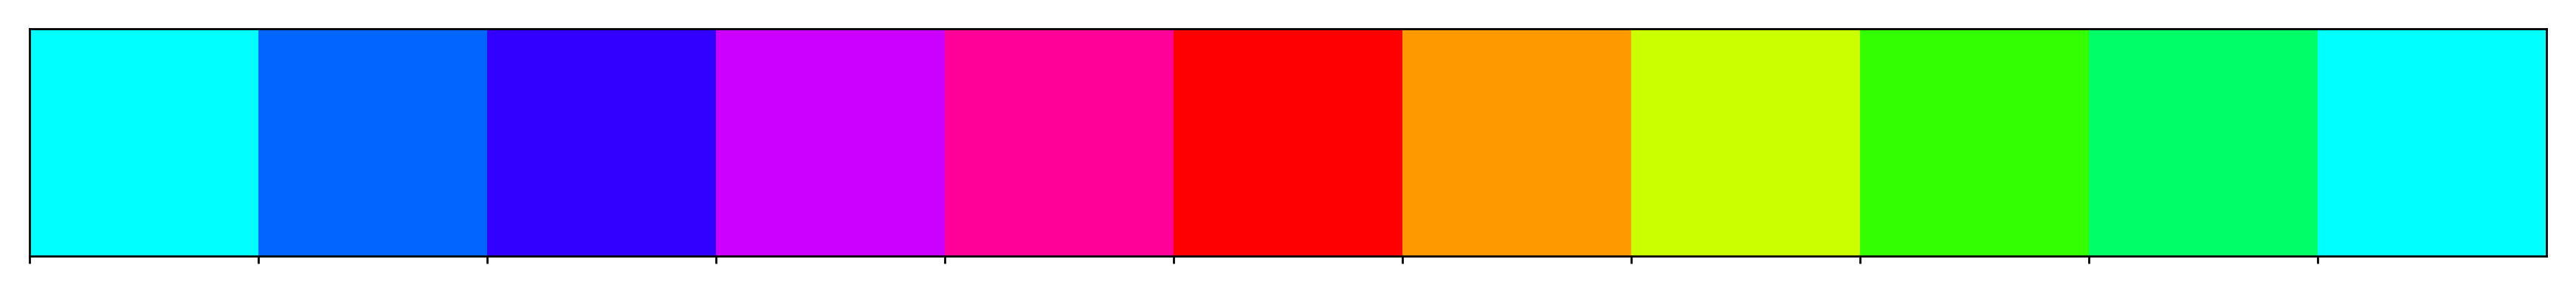

In [6]:
sns.palplot([angle_to_color(x) for x in np.linspace(-np.pi, np.pi, 11)])

(0.0, 1.0)

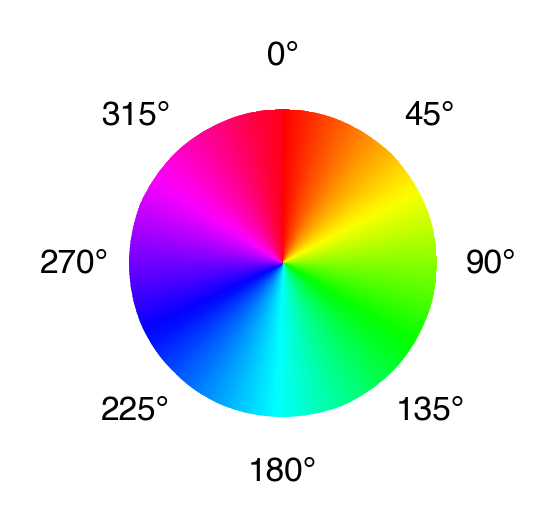

In [7]:
fig = plt.figure(figsize=(1, 1))
ax = fig.add_subplot(111, projection='polar')
norm = mpl.colors.Normalize(vmin=0, vmax=np.pi * 2)
cb = mpl.colorbar.ColorbarBase(ax, cmap=mpl.cm.hsv, norm=norm, orientation='horizontal')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_rticks([])
cb.outline.set_visible(False)
ax.grid(False)
ax.set_rlim(0, 1)

In [8]:
for age, _d in fits.items():
    break

In [9]:
keys = list(_d)

In [10]:
all_movements = np.array([_d[k]['params']['movement_vector'].reshape(-1, 2) for k in keys])
all_movements = flatten(all_movements)

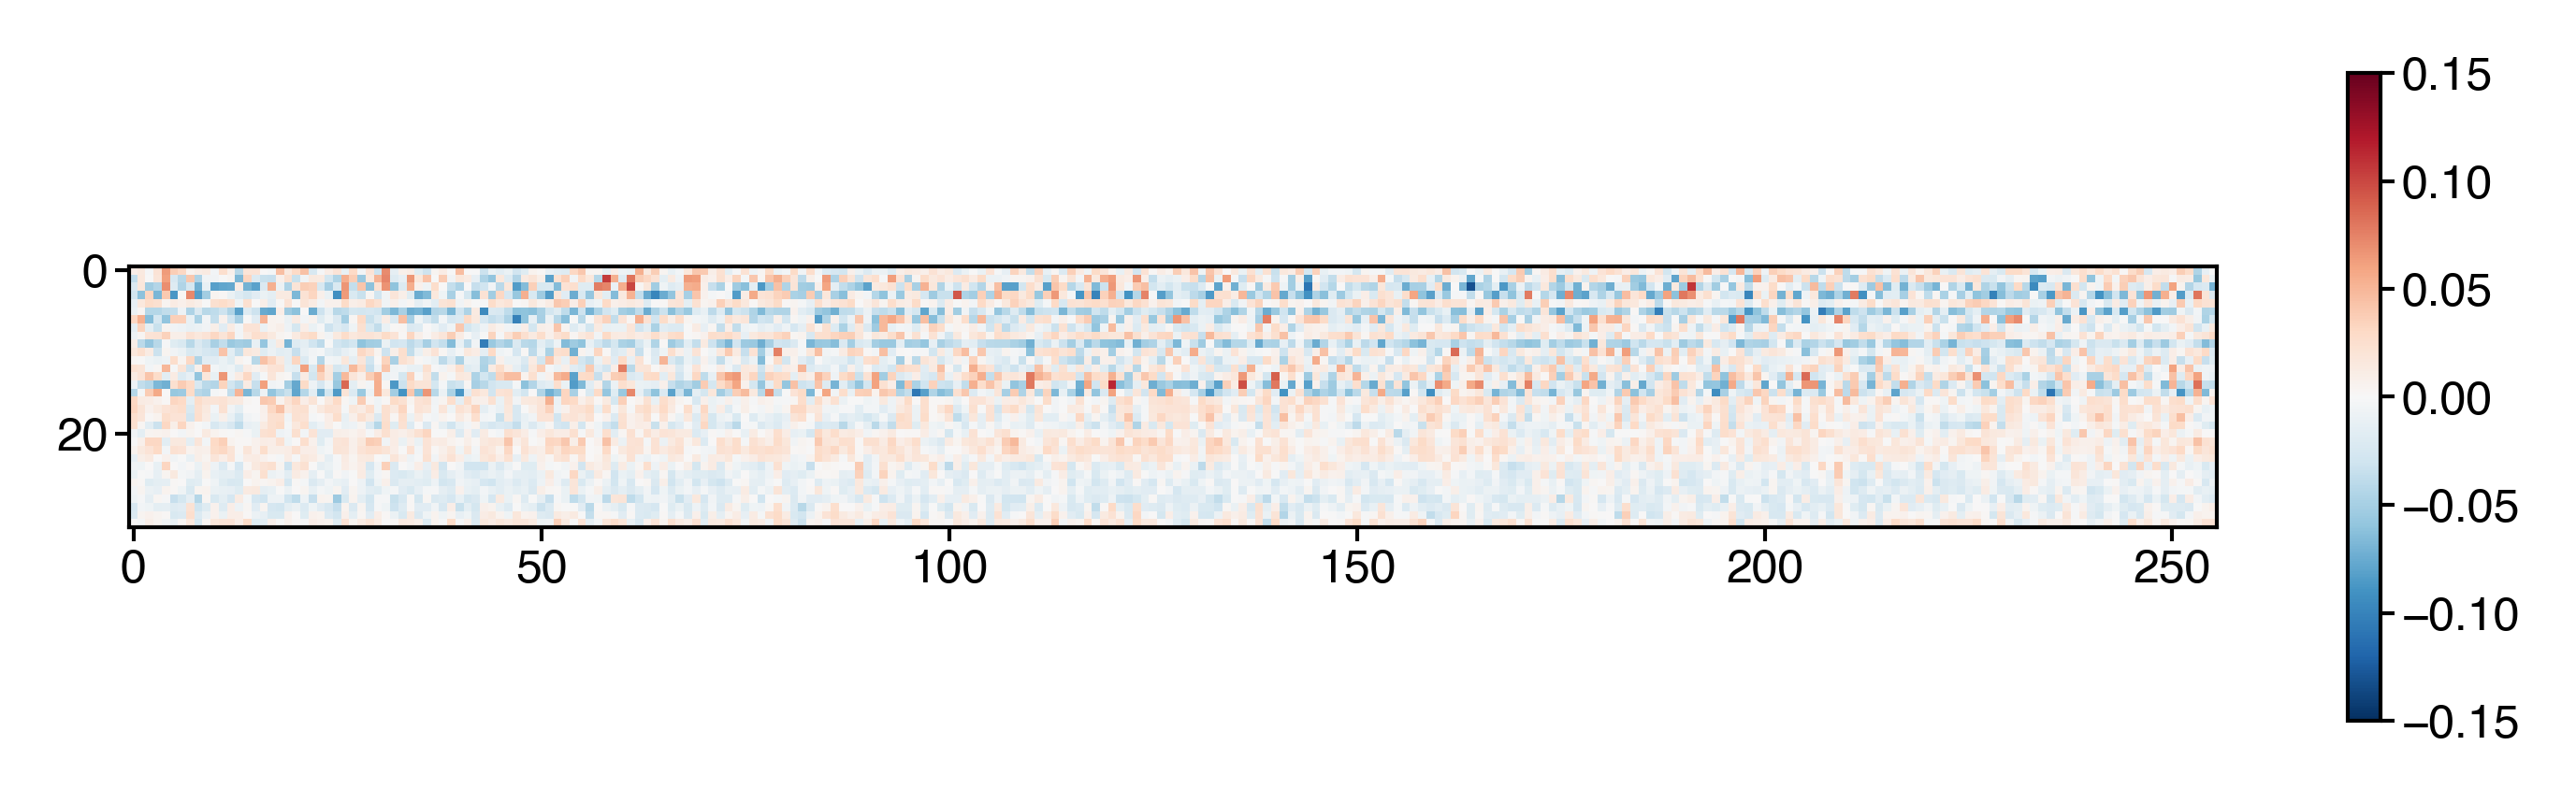

In [11]:
figure(6, 1.5)
plt.imshow(all_movements.T, cmap="RdBu_r", interpolation="none", vmin=-0.15, vmax=0.15)
plt.colorbar()

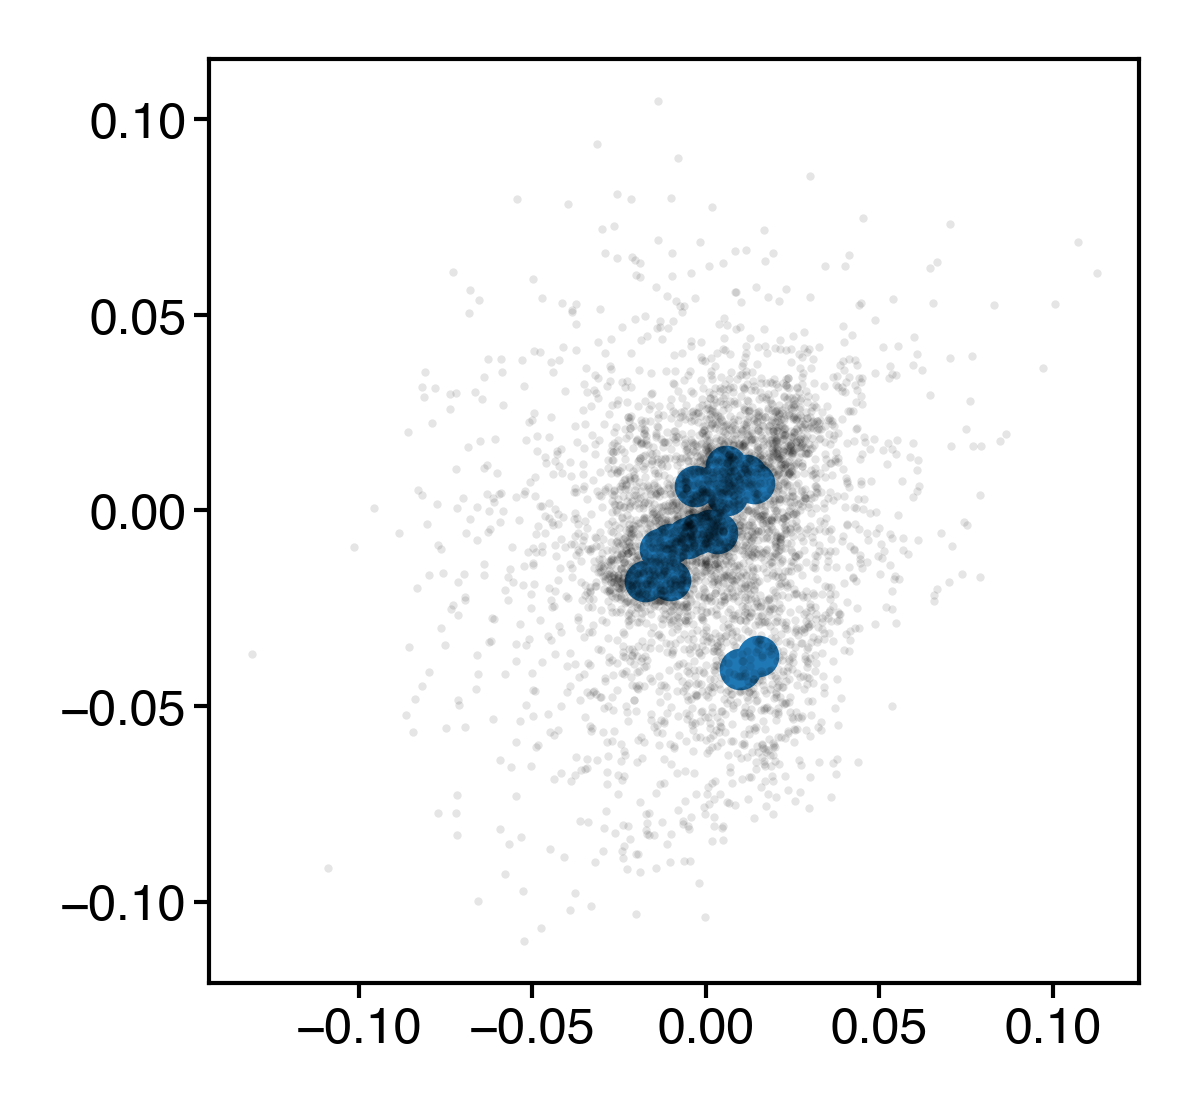

In [12]:
avg_movements = np.array([_d[k]['params']['movement_vector'].reshape(-1, 2) for k in keys]).mean(0)
figure(2, 2)
plt.scatter(*avg_movements.T, s=25, lw=0)
for k in keys:
    plt.scatter(*_d[k]['params']['movement_vector'].reshape(-1, 2).T, s=1, alpha=0.1, c='k', lw=0)

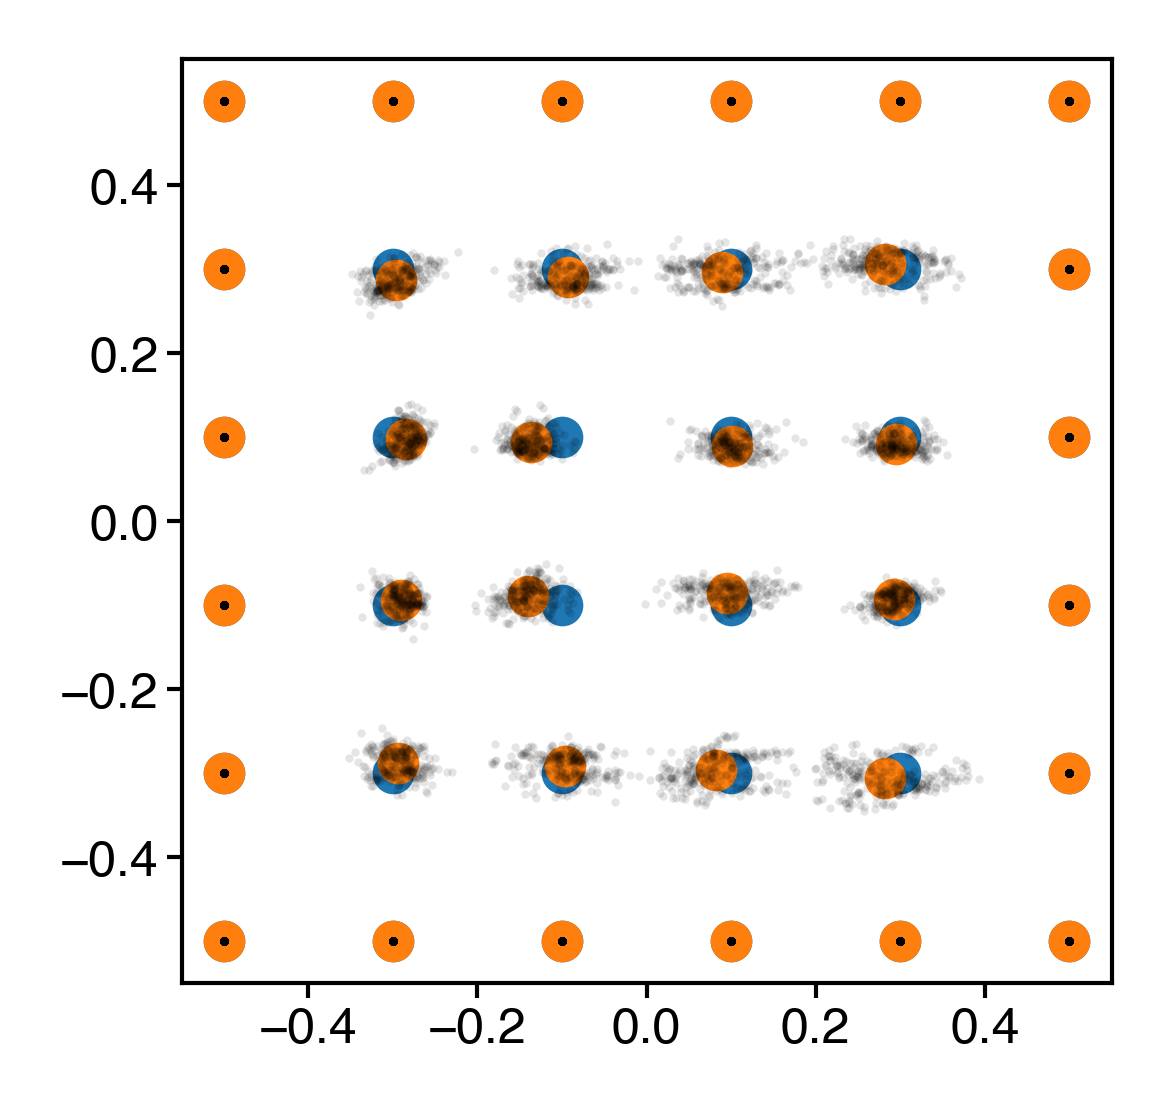

In [13]:
avg_grid = np.array([_d[k]['transformed_grid'] for k in keys]).mean(0)
figure(2, 2)
plt.scatter(*_d[keys[0]]['grid'].T, s=25, lw=0)
plt.scatter(*avg_grid.T, s=25, lw=0)
for k in keys:
    plt.scatter(*_d[k]['transformed_grid'].T, s=1, alpha=0.1, c='k', lw=0)

## Plot average movement vectors

In [14]:
age_movements = {}
for age, _d in fits.items():
    avg_movements = np.array([_d[k]['params']['movement_vector'].reshape(-1, 2) for k in _d]).mean(0)
    age_movements[age] = avg_movements
# sort dict by key
age_movements = {k: v for k, v in sorted(age_movements.items(), key=lambda item: item[0])}
age_movements = valmap(lambda x: x.flatten(), age_movements)

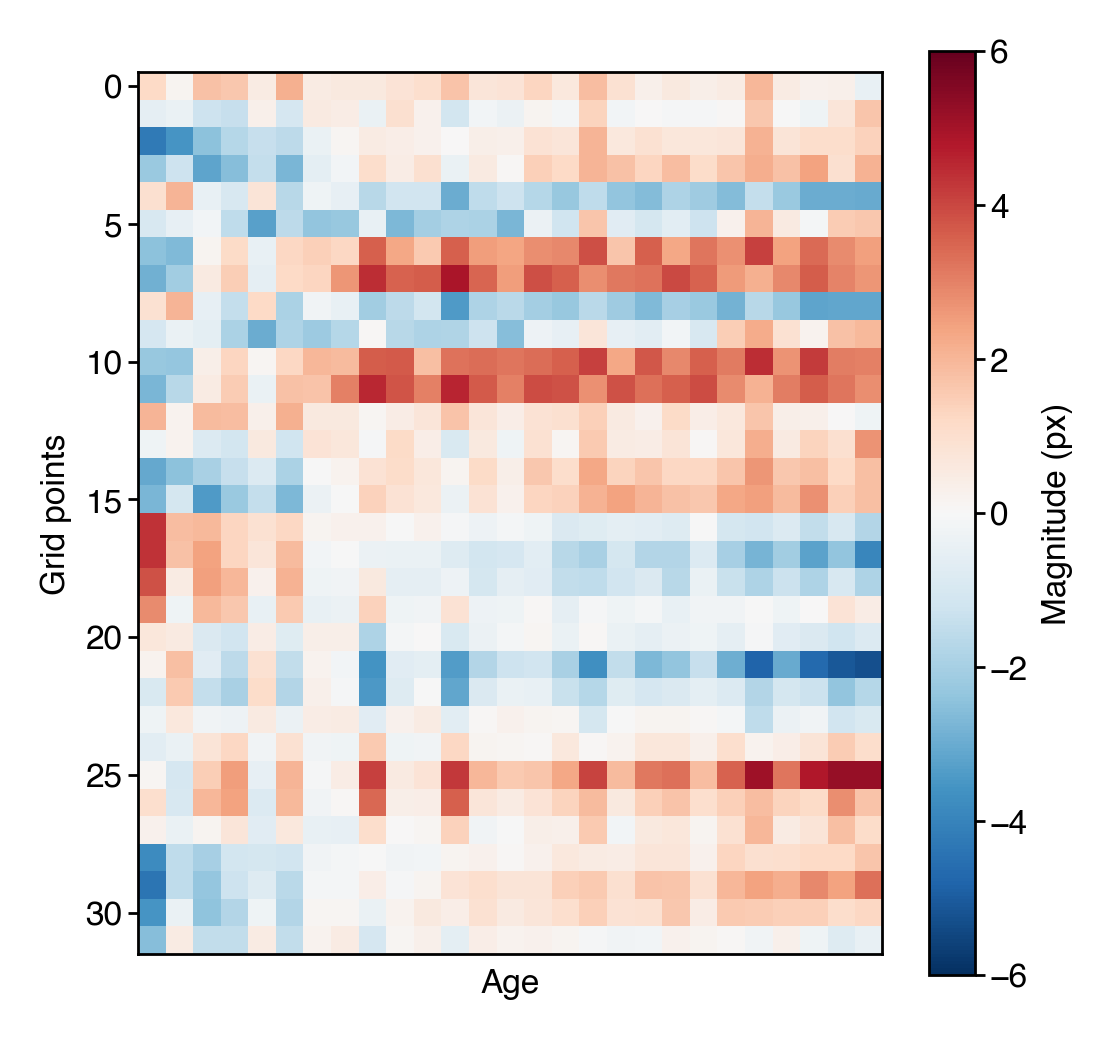

In [15]:
arr = np.array(list(age_movements.values())).T * 80
plt.imshow(arr, cmap="RdBu_r", interpolation="none", vmin=-6, vmax=6)
plt.xticks([])
plt.ylabel("Grid points")
plt.xlabel("Age")
plt.colorbar(label="Magnitude (px)")

Text(0, 0.5, 'Flow in y direction (px)')

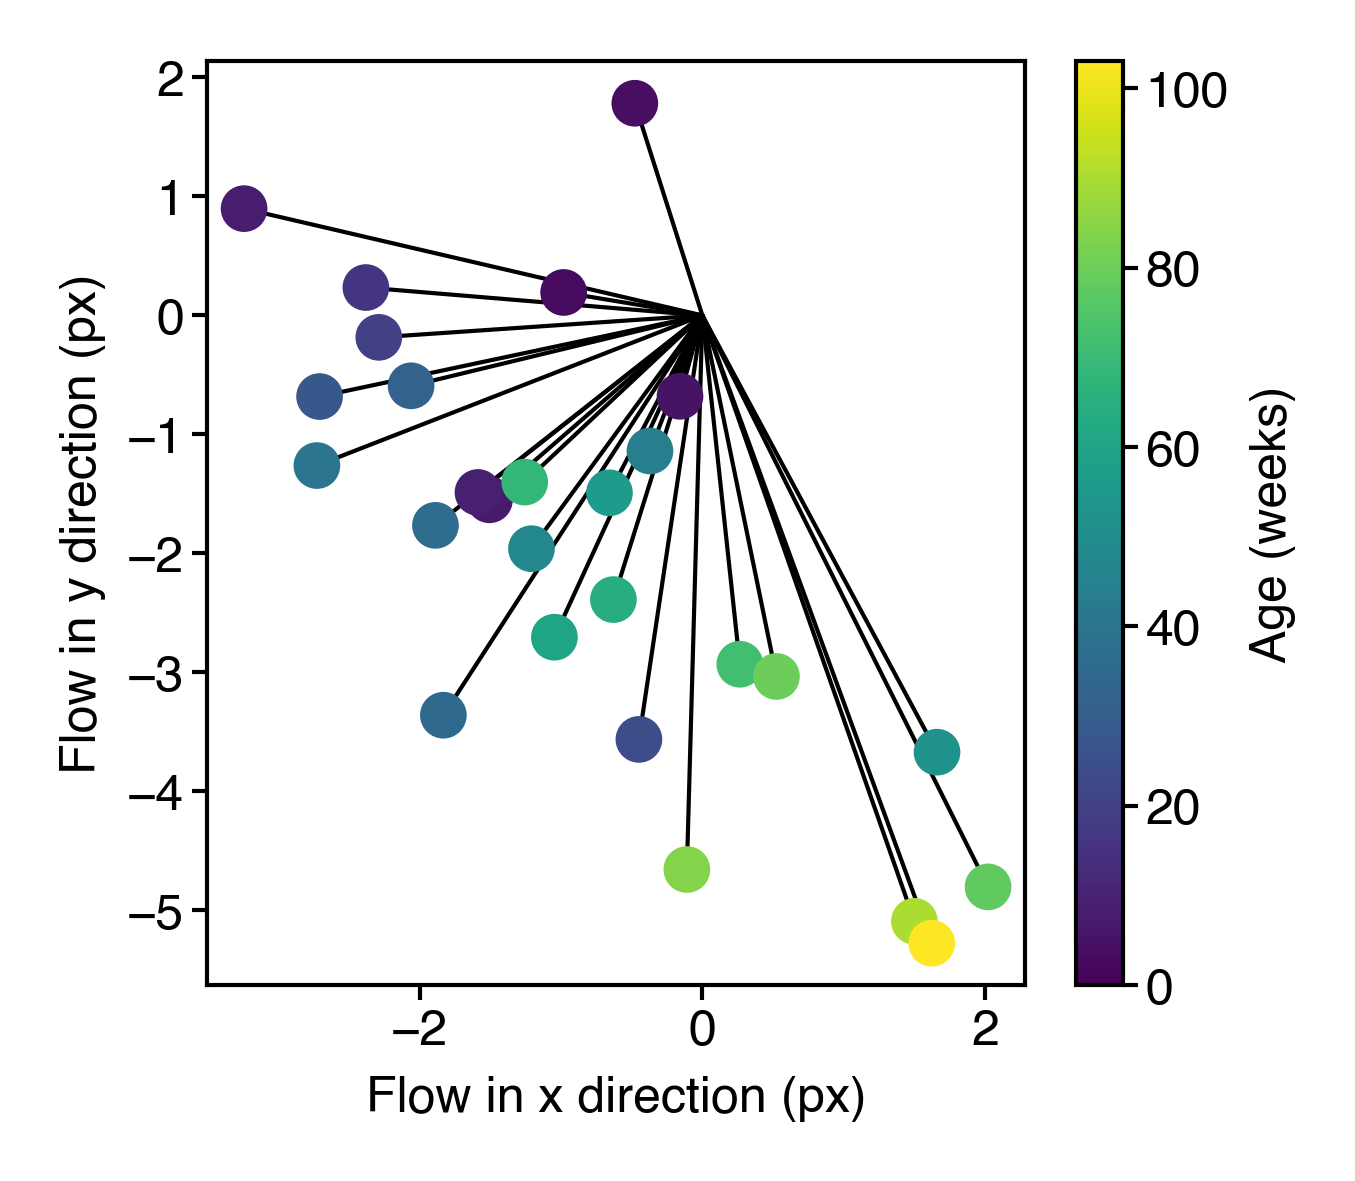

In [16]:
figure(2.2, 2)
x_index = 5
for x, y in zip(arr[x_index], arr[x_index + 16]):
    plt.plot([0, x], [0, y], c='k', lw=0.5, zorder=-1)
plt.scatter(arr[x_index], arr[x_index + 16], c=list(age_movements), cmap='viridis', vmin=0)
plt.colorbar(label="Age (weeks)")
plt.xlabel("Flow in x direction (px)")
plt.ylabel("Flow in y direction (px)")

Text(0, 0.5, 'Flow in y direction (px)')

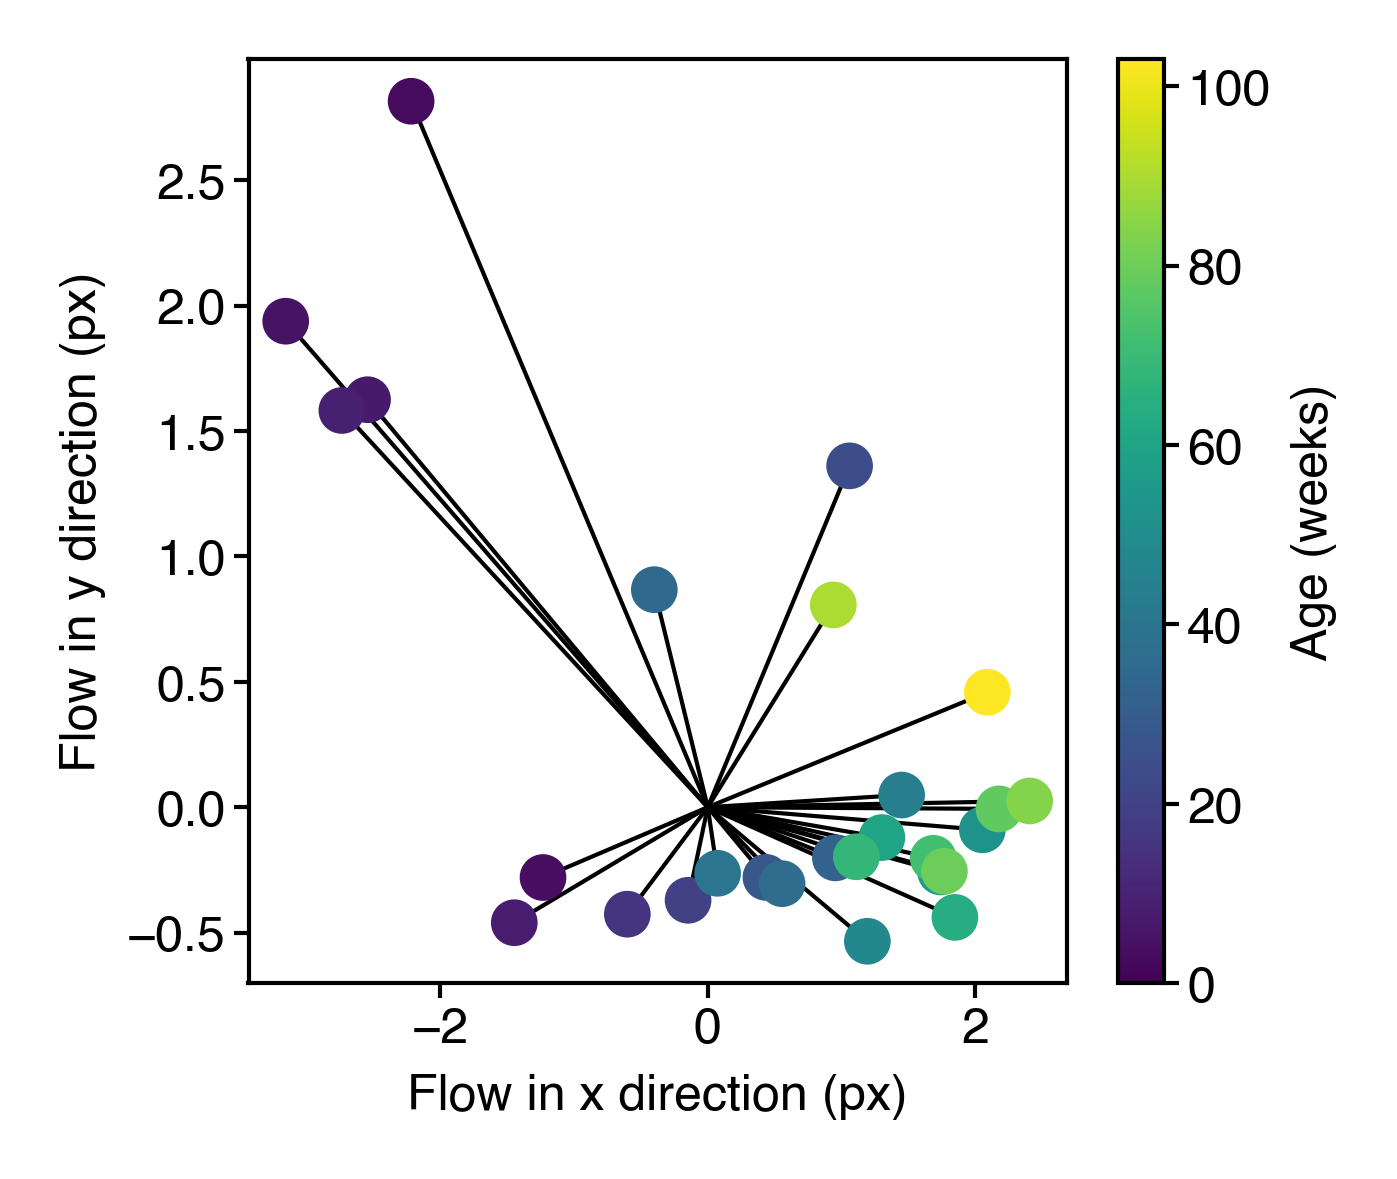

In [17]:
figure(2.2, 2)
x_index = 3
for x, y in zip(arr[x_index], arr[x_index + 16]):
    plt.plot([0, x], [0, y], c='k', lw=0.5, zorder=-1)
plt.scatter(arr[x_index], arr[x_index + 16], c=list(age_movements), cmap='viridis', vmin=0)
plt.colorbar(label="Age (weeks)")
plt.xlabel("Flow in x direction (px)")
plt.ylabel("Flow in y direction (px)")

Text(0, 0.5, 'Flow in y direction (px)')

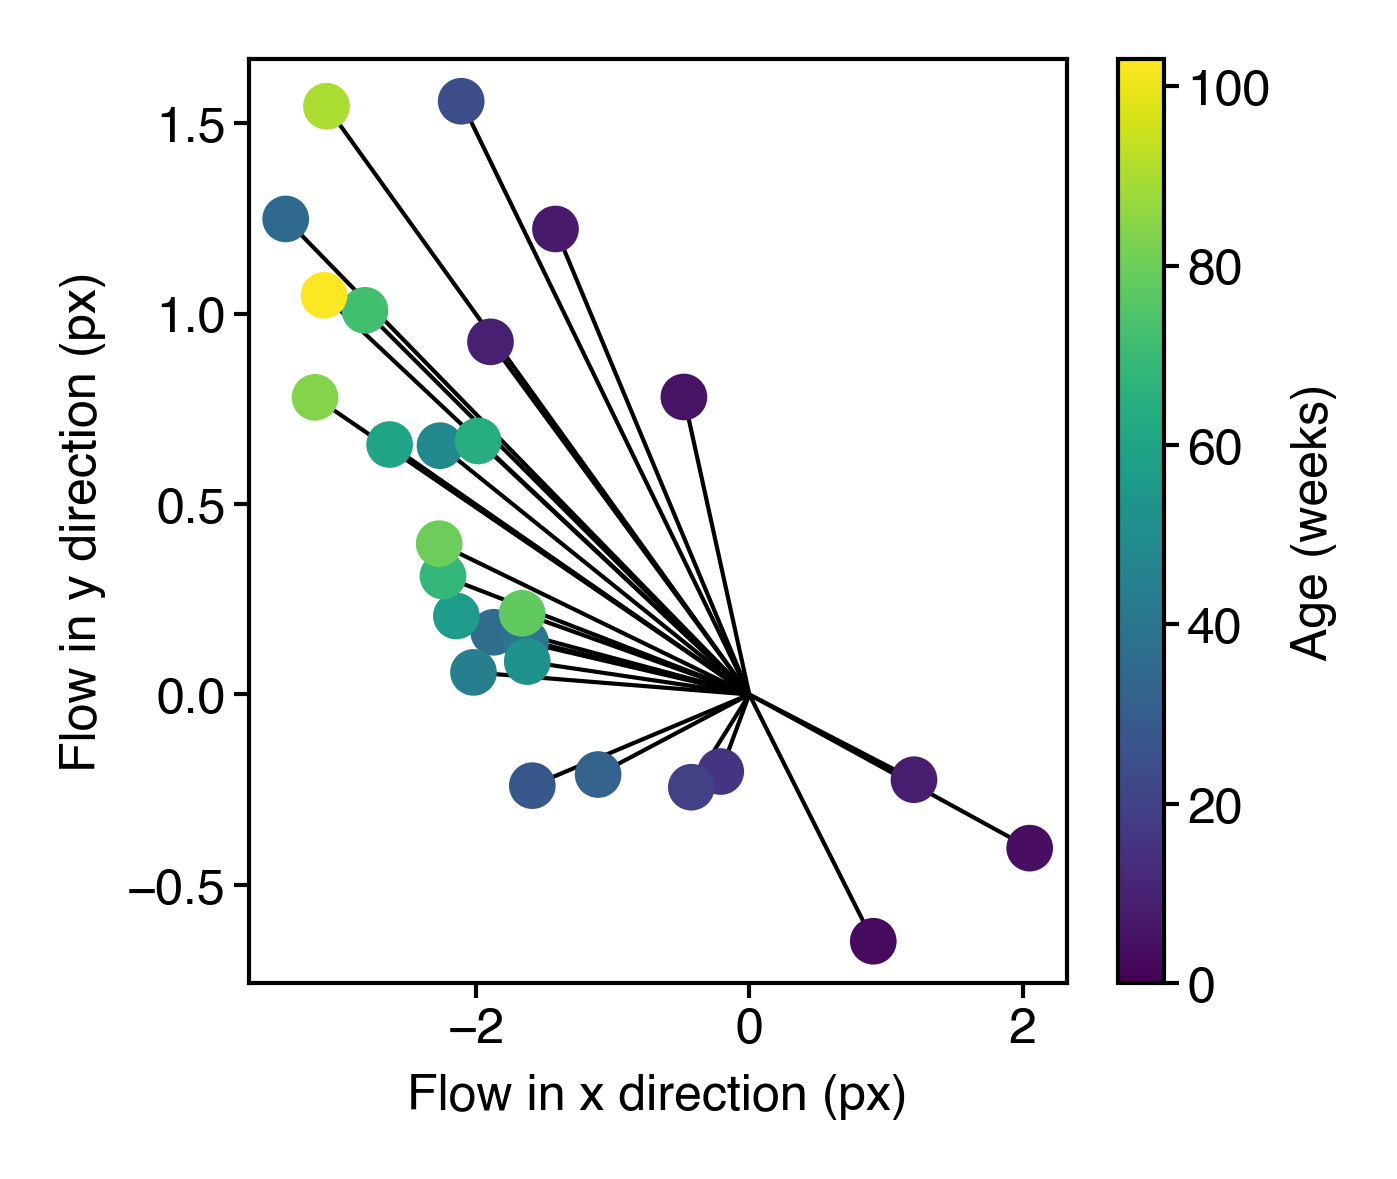

In [18]:
figure(2.2, 2)
x_index = 8
for x, y in zip(arr[x_index], arr[x_index + 16]):
    plt.plot([0, x], [0, y], c='k', lw=0.5, zorder=-1)
plt.scatter(arr[x_index], arr[x_index + 16], c=list(age_movements), cmap='viridis', vmin=0)
plt.colorbar(label="Age (weeks)")
plt.xlabel("Flow in x direction (px)")
plt.ylabel("Flow in y direction (px)")

Text(0, 0.5, 'Flow in y direction (px)')

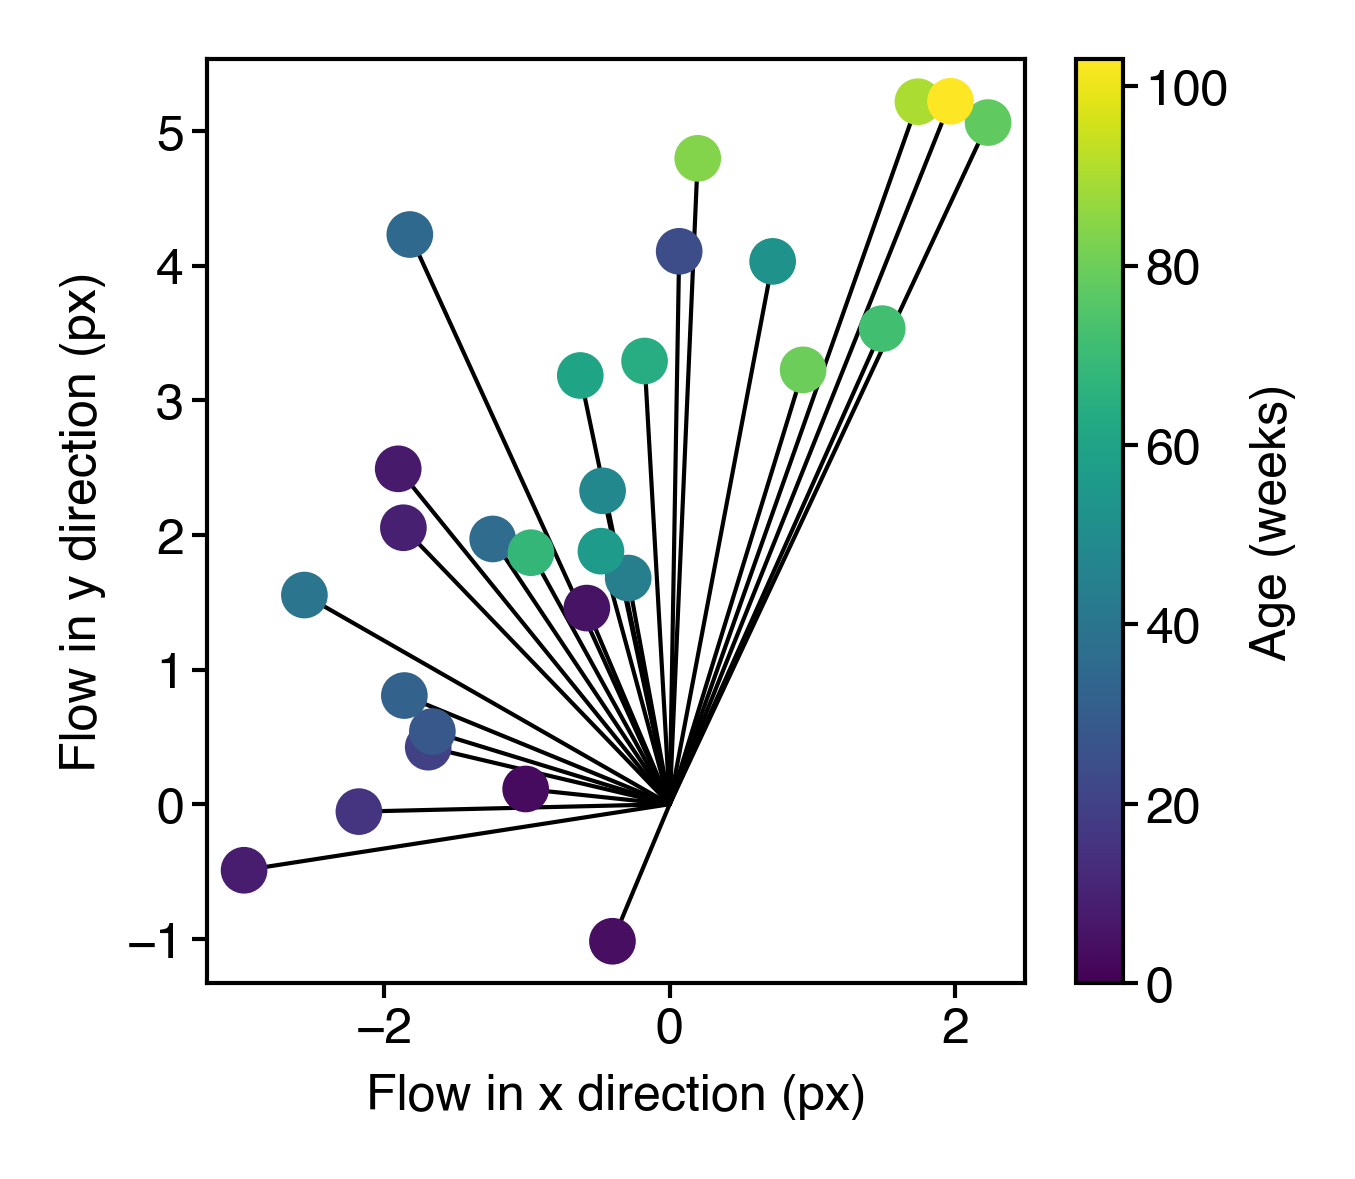

In [19]:
figure(2.2, 2)
x_index = 9
for x, y in zip(arr[x_index], arr[x_index + 16]):
    plt.plot([0, x], [0, y], c='k', lw=0.5, zorder=-1)
plt.scatter(arr[x_index], arr[x_index + 16], c=list(age_movements), cmap='viridis', vmin=0)
plt.colorbar(label="Age (weeks)")
plt.xlabel("Flow in x direction (px)")
plt.ylabel("Flow in y direction (px)")

## Plot grids for a series of ages

In [10]:
def grid_xform(g):
    return (g + 0.5) * 80

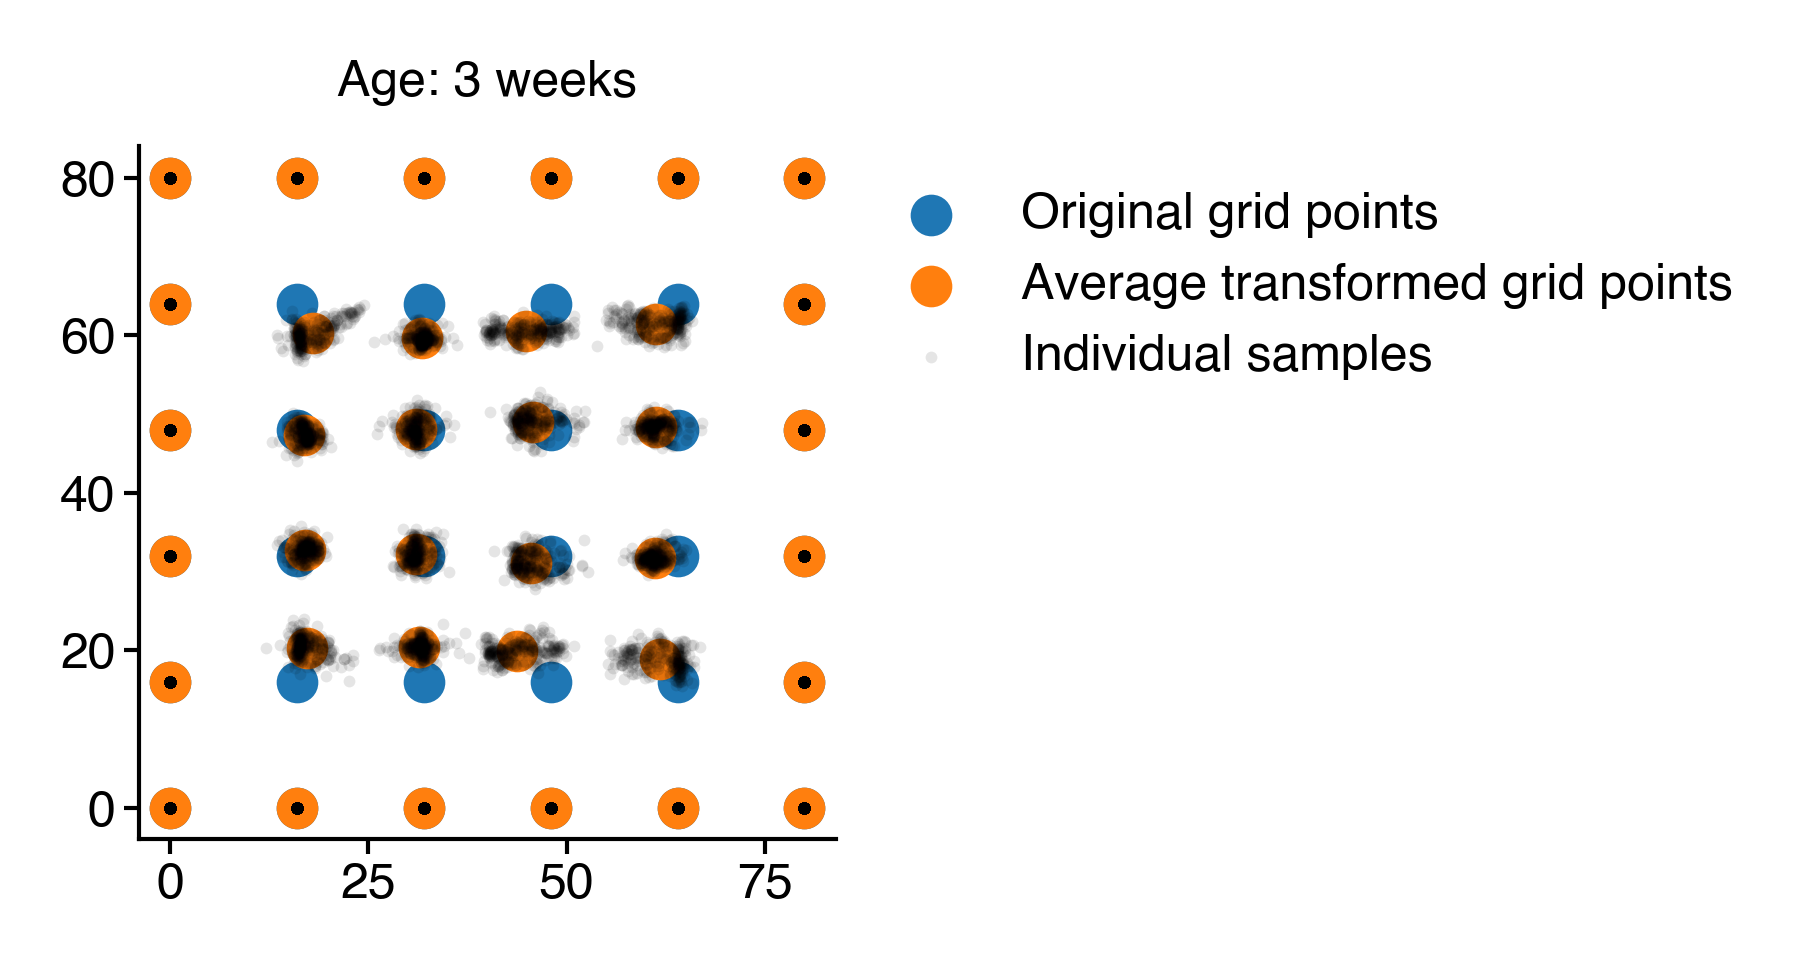

In [21]:
age_key = 3
_d = fits[age_key]
avg_grid = grid_xform(np.array([_d[k]['transformed_grid'] for k in _d]).mean(0))
figure(1.5, 1.5)
plt.scatter(*grid_xform(_d[list(_d)[0]]['grid']).T, s=25, lw=0, label="Original grid points")
plt.scatter(*avg_grid.T, s=25, lw=0, label="Average transformed grid points")
for i, k in enumerate(_d):
    if i == 0:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0, label="Individual samples")
    else:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0)
plt.title(f"Age: {age_key} weeks")
legend()
sns.despine()

Text(0.5, 0.98, 'Age: 3 weeks')

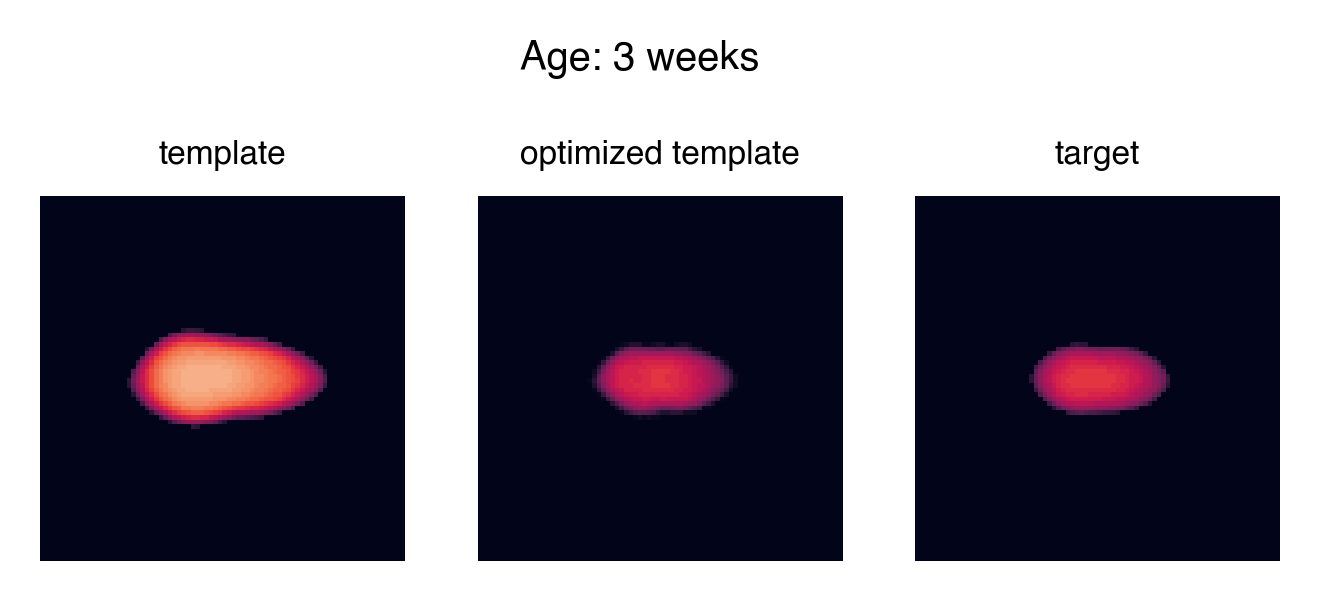

In [22]:
_keys = list(_d)
ex = _d[_keys[1]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 3 weeks')

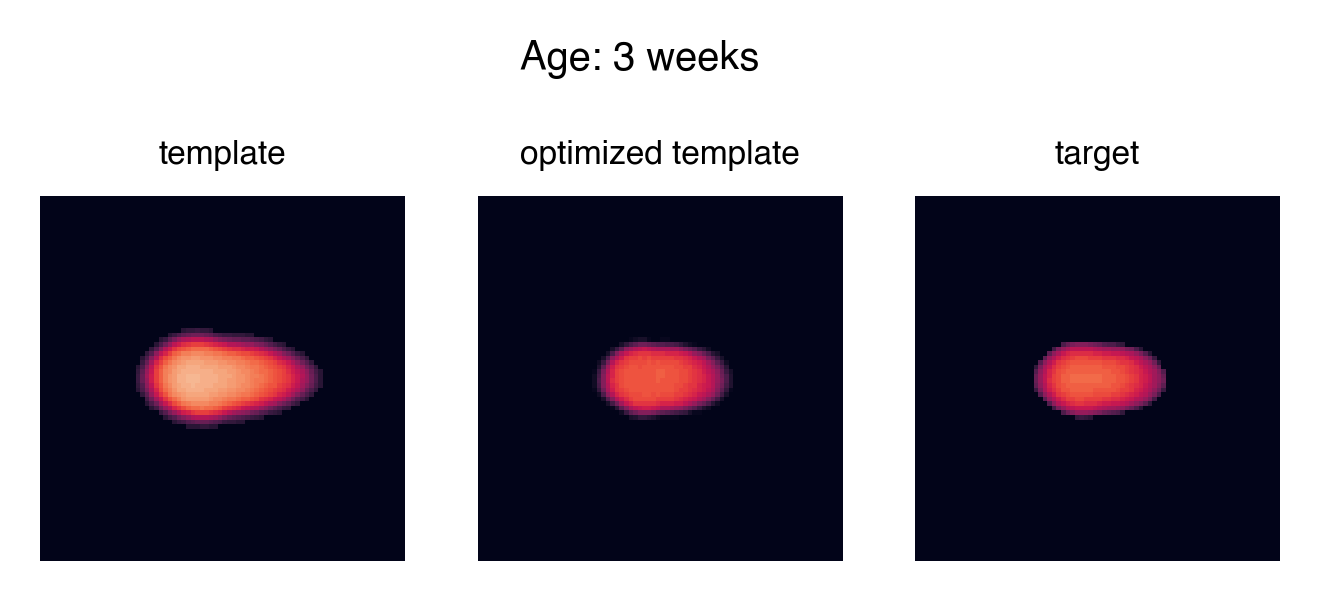

In [23]:
_keys = list(_d)
ex = _d[_keys[0]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 3 weeks')

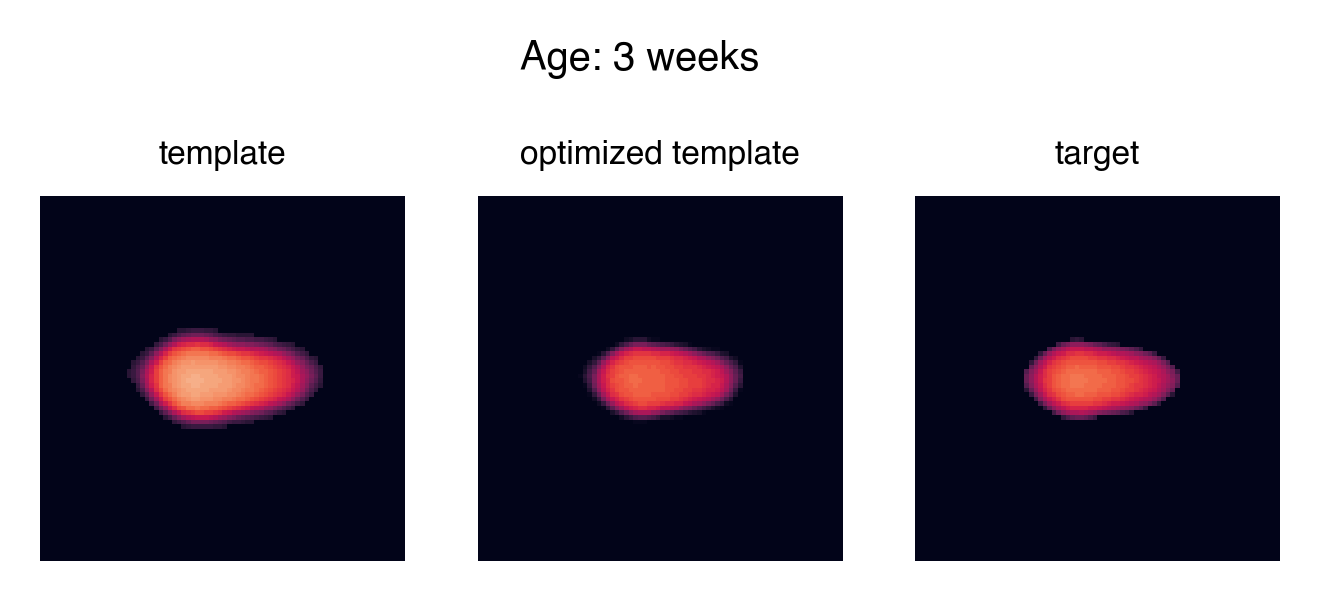

In [24]:
_keys = list(_d)
ex = _d[_keys[12]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

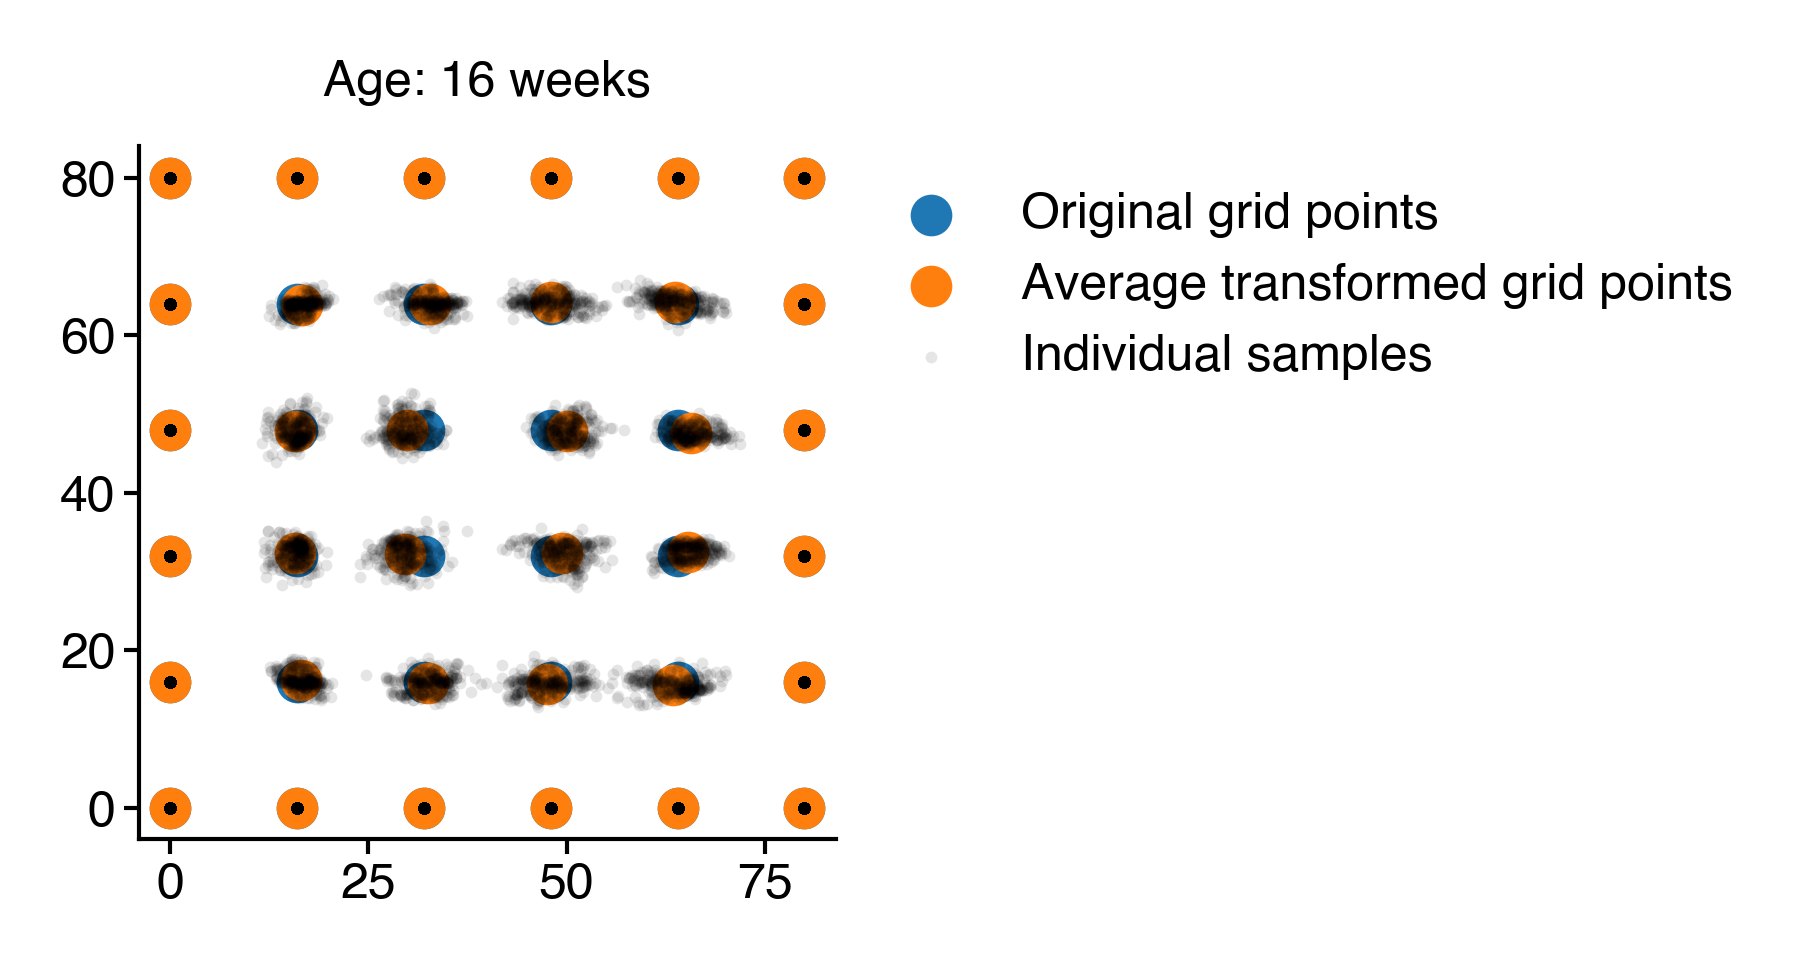

In [25]:
age_key = 16
_d = fits[age_key]
avg_grid = grid_xform(np.array([_d[k]['transformed_grid'] for k in _d]).mean(0))
figure(1.5, 1.5)
plt.scatter(*grid_xform(_d[list(_d)[0]]['grid']).T, s=25, lw=0, label="Original grid points")
plt.scatter(*avg_grid.T, s=25, lw=0, label="Average transformed grid points")
for i, k in enumerate(_d):
    if i == 0:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0, label="Individual samples")
    else:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0)
plt.title(f"Age: {age_key} weeks")
legend()
sns.despine()

Text(0.5, 0.98, 'Age: 16 weeks')

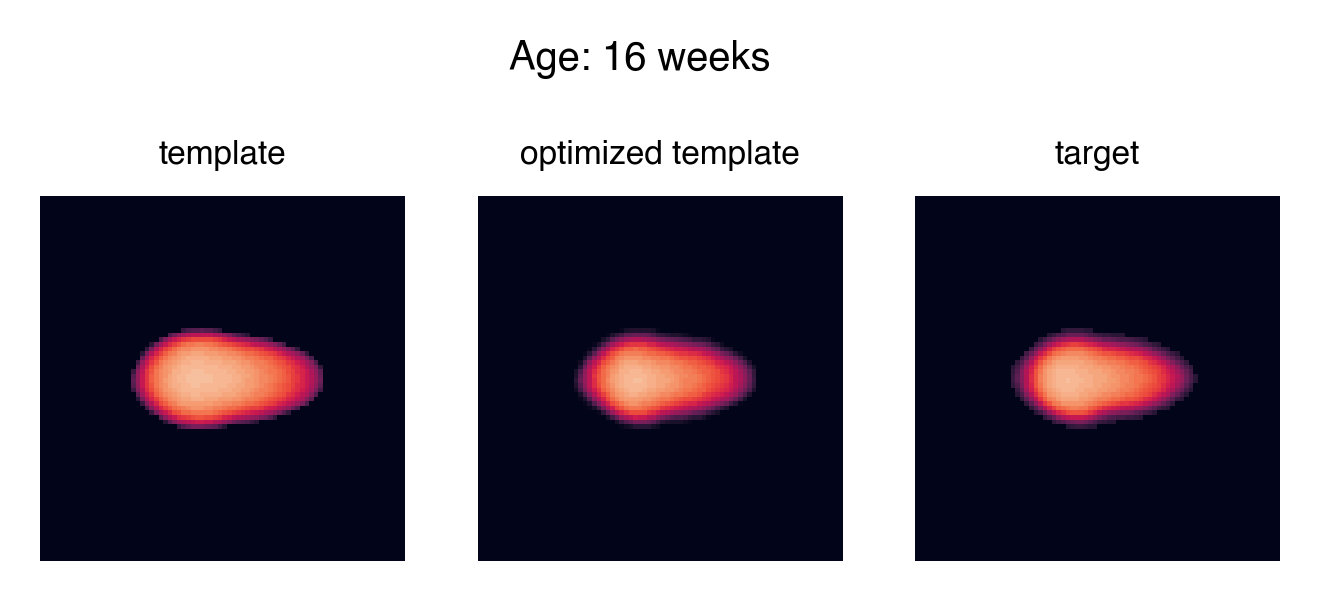

In [26]:
_keys = list(_d)
ex = _d[_keys[0]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 16 weeks')

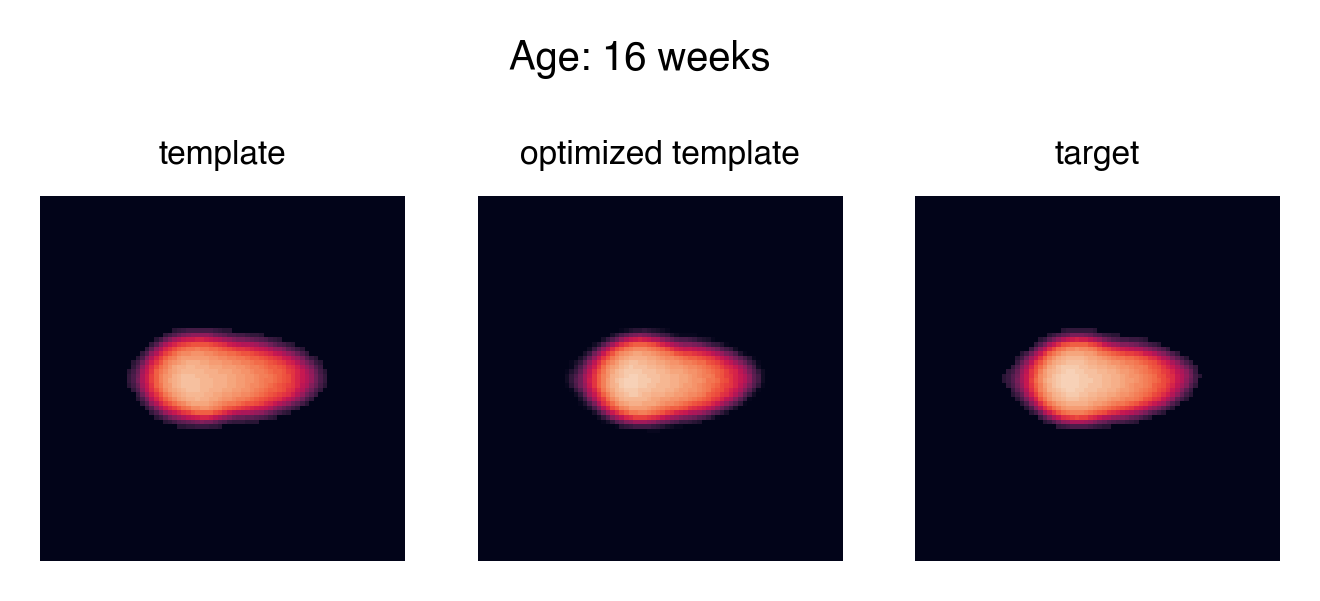

In [27]:
_keys = list(_d)
ex = _d[_keys[1]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 16 weeks')

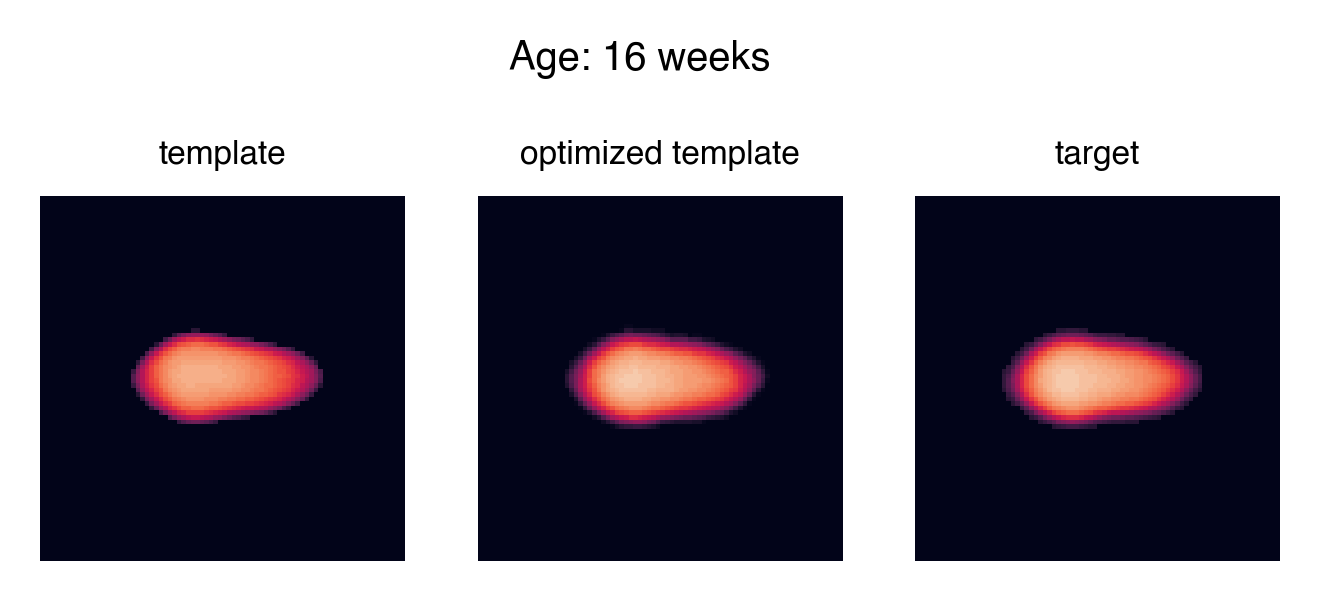

In [28]:
_keys = list(_d)
ex = _d[_keys[5]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

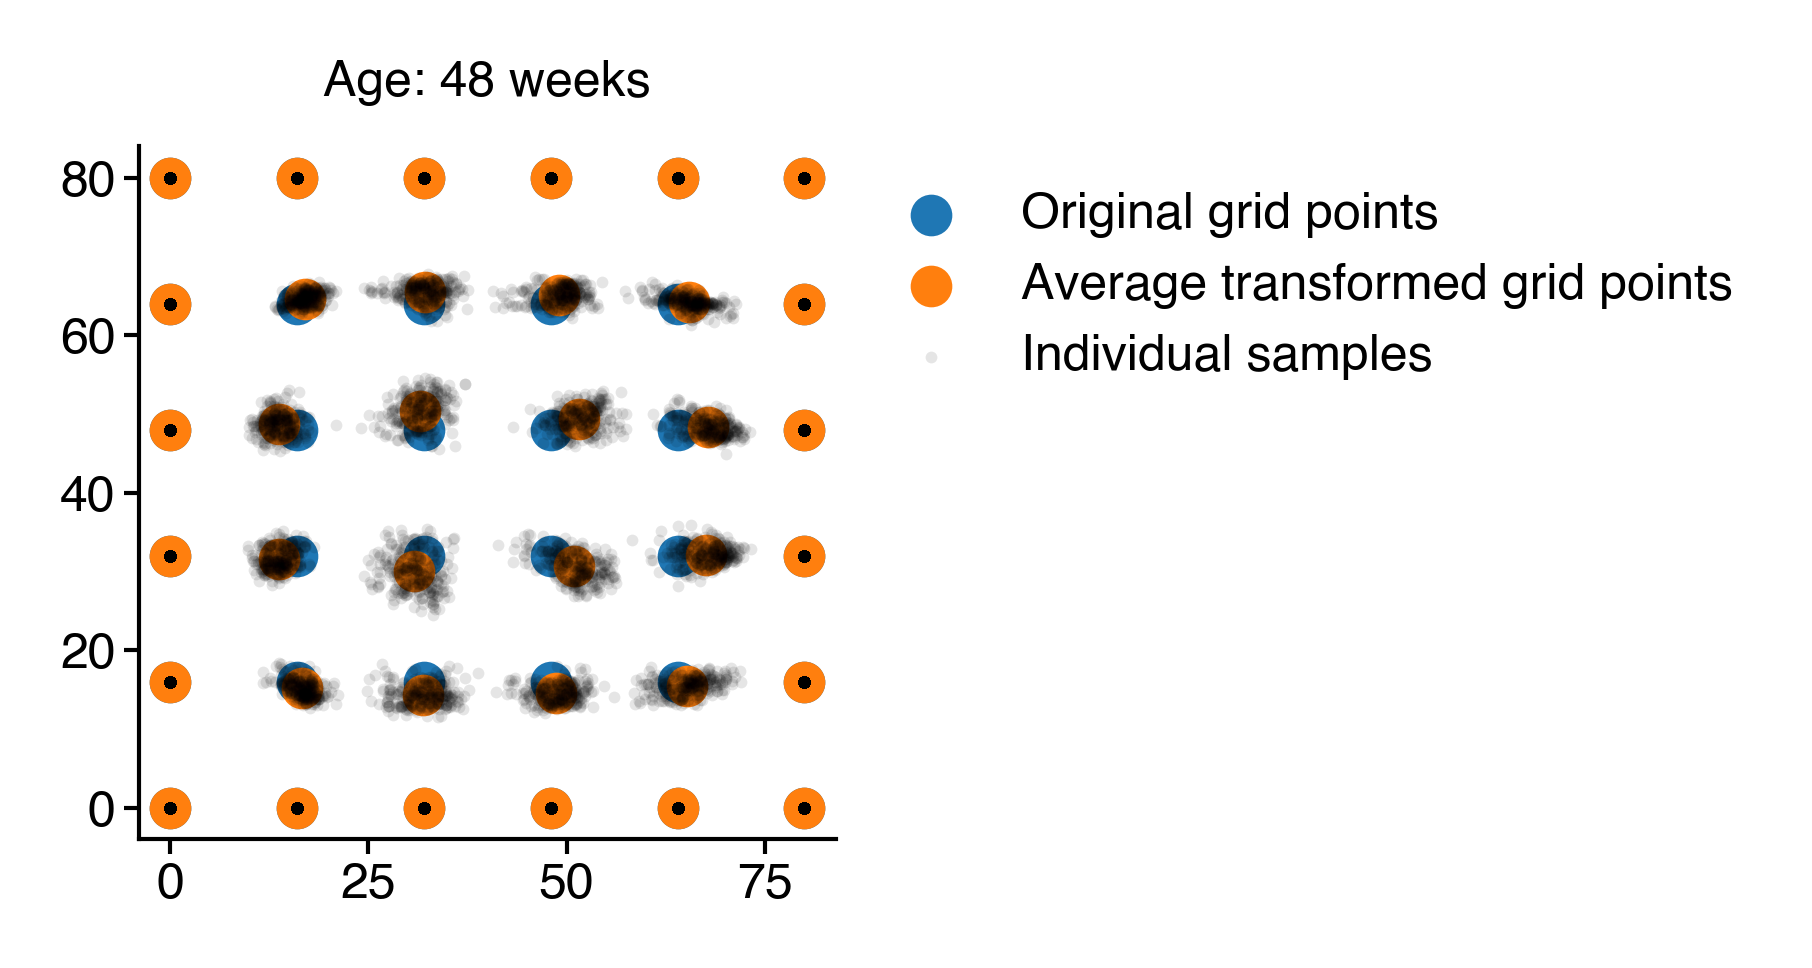

In [29]:
age_key = 48
_d = fits[age_key]
avg_grid = grid_xform(np.array([_d[k]['transformed_grid'] for k in _d]).mean(0))
figure(1.5, 1.5)
plt.scatter(*grid_xform(_d[list(_d)[0]]['grid']).T, s=25, lw=0, label="Original grid points")
plt.scatter(*avg_grid.T, s=25, lw=0, label="Average transformed grid points")
for i, k in enumerate(_d):
    if i == 0:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0, label="Individual samples")
    else:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0)
plt.title(f"Age: {age_key} weeks")
legend()
sns.despine()

Text(0.5, 0.98, 'Age: 48 weeks')

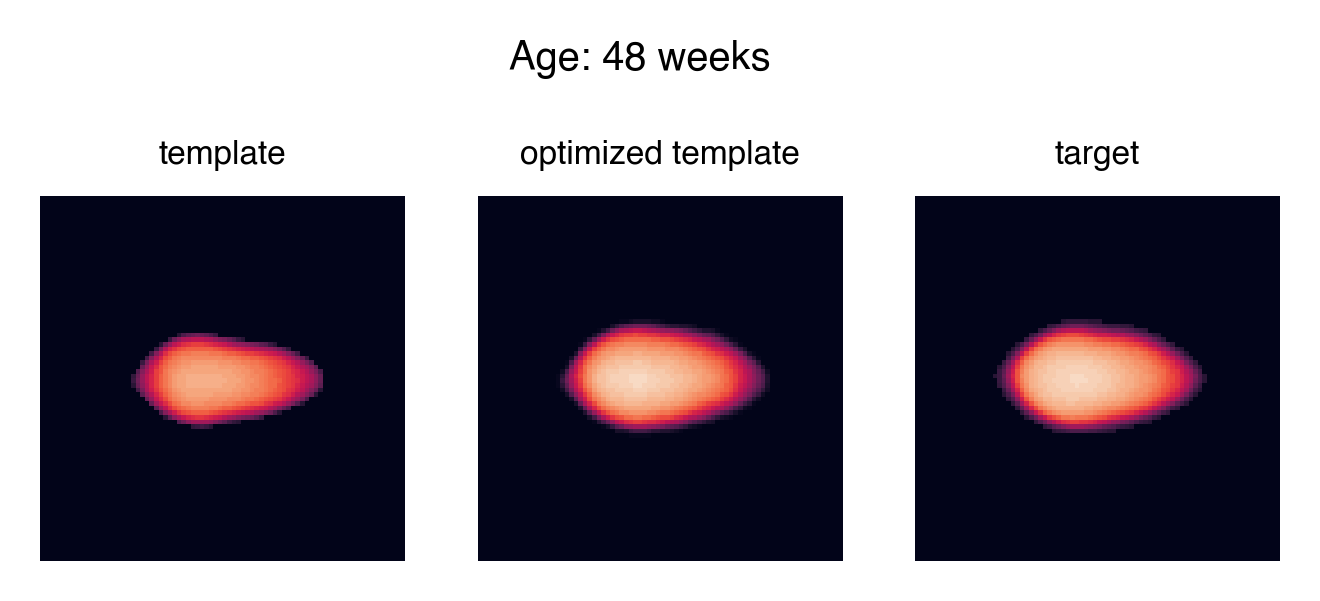

In [30]:
_keys = list(_d)
ex = _d[_keys[0]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 48 weeks')

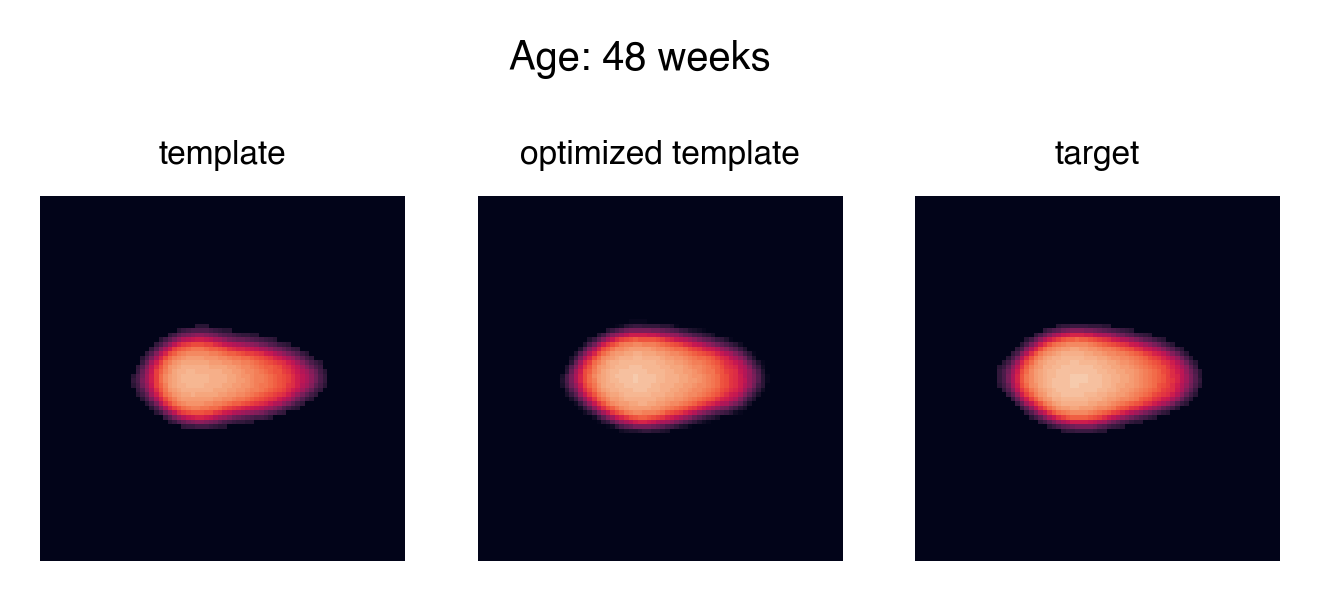

In [31]:
_keys = list(_d)
ex = _d[_keys[2]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 48 weeks')

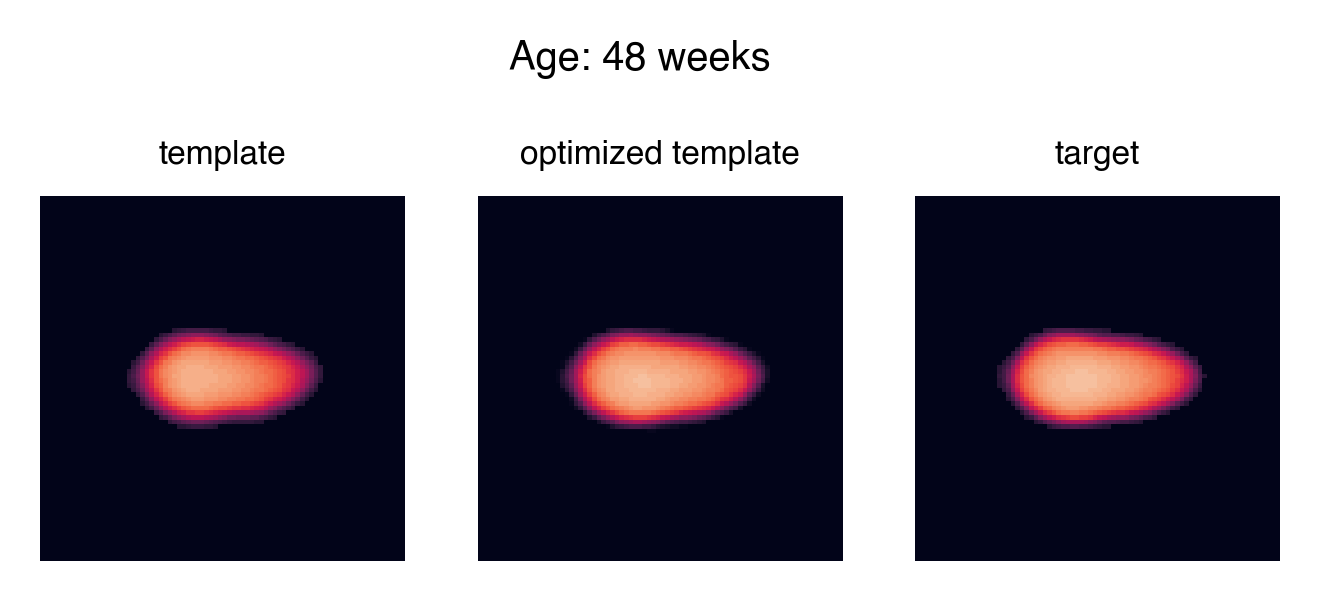

In [32]:
_keys = list(_d)
ex = _d[_keys[3]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

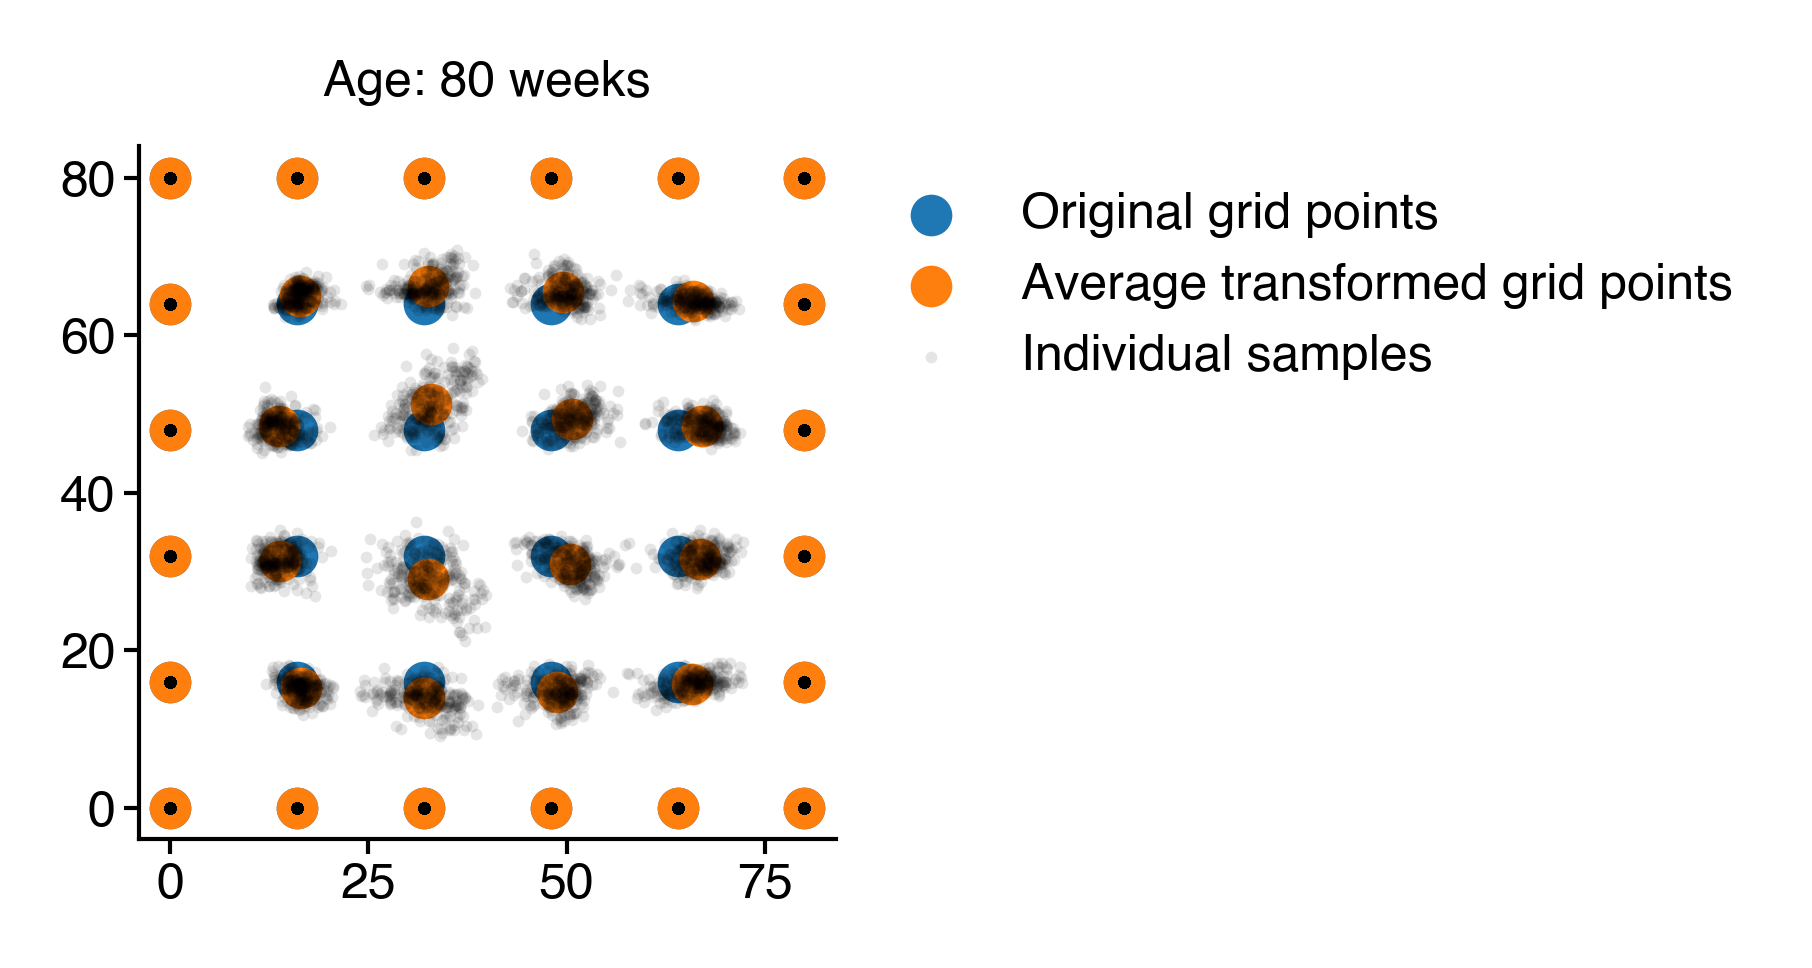

In [33]:
age_key = 80
_d = fits[age_key]
avg_grid = grid_xform(np.array([_d[k]['transformed_grid'] for k in _d]).mean(0))
figure(1.5, 1.5)
plt.scatter(*grid_xform(_d[list(_d)[0]]['grid']).T, s=25, lw=0, label="Original grid points")
plt.scatter(*avg_grid.T, s=25, lw=0, label="Average transformed grid points")
for i, k in enumerate(_d):
    if i == 0:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0, label="Individual samples")
    else:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0)
plt.title(f"Age: {age_key} weeks")
legend()
sns.despine()

Text(0.5, 0.98, 'Age: 80 weeks')

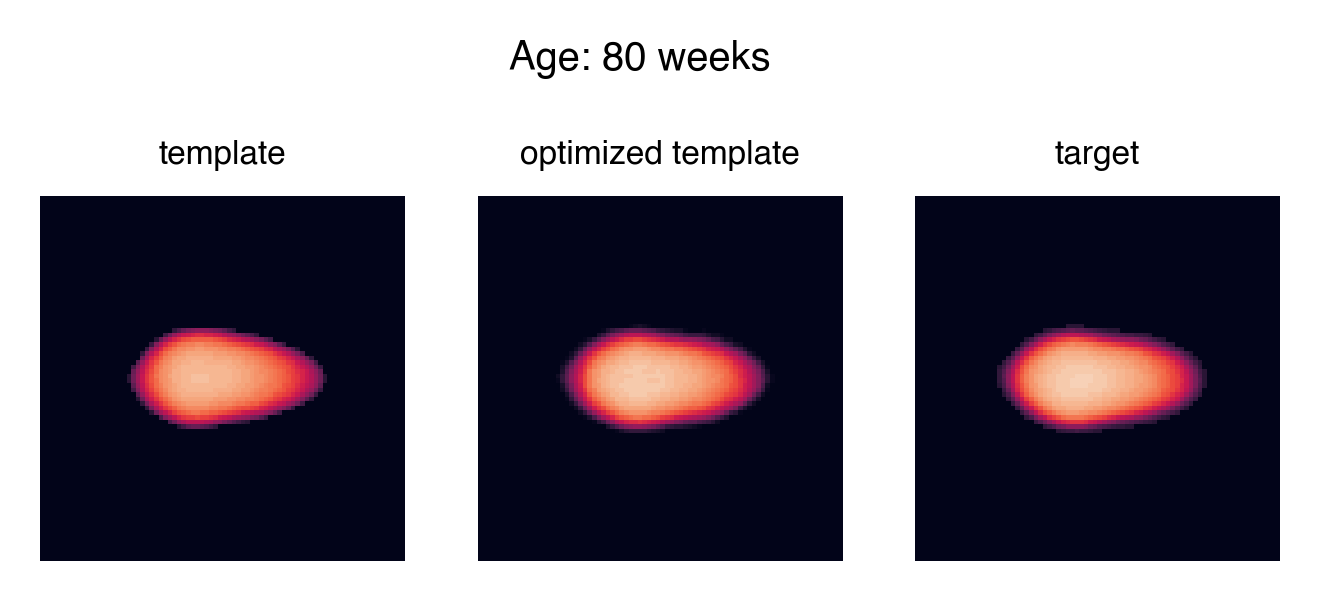

In [34]:
_keys = list(_d)
ex = _d[_keys[0]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 80 weeks')

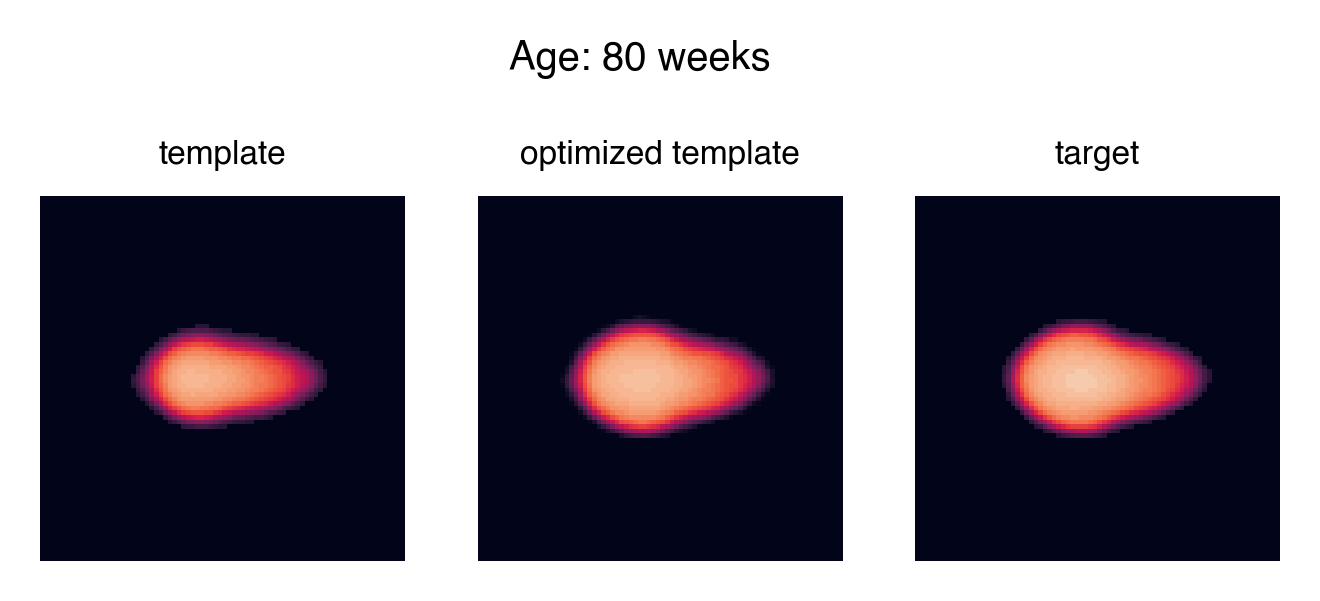

In [35]:
_keys = list(_d)
ex = _d[_keys[2]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

Text(0.5, 0.98, 'Age: 80 weeks')

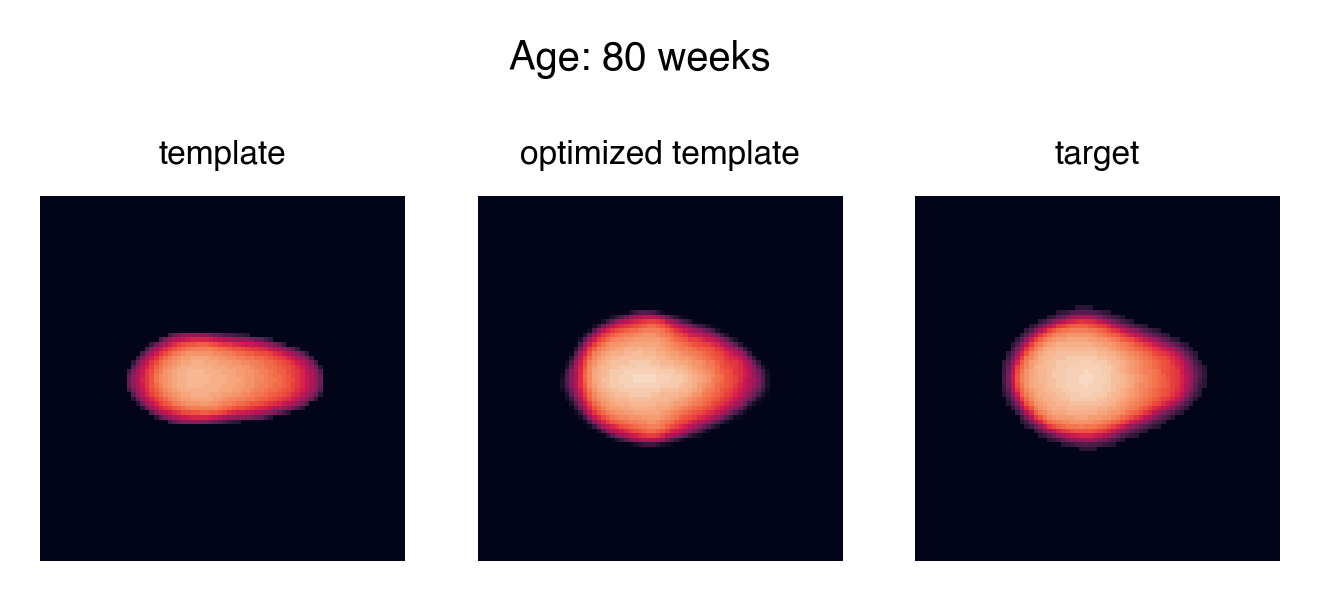

In [36]:
_keys = list(_d)
ex = _d[_keys[3]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle(f"Age: {age_key} weeks")

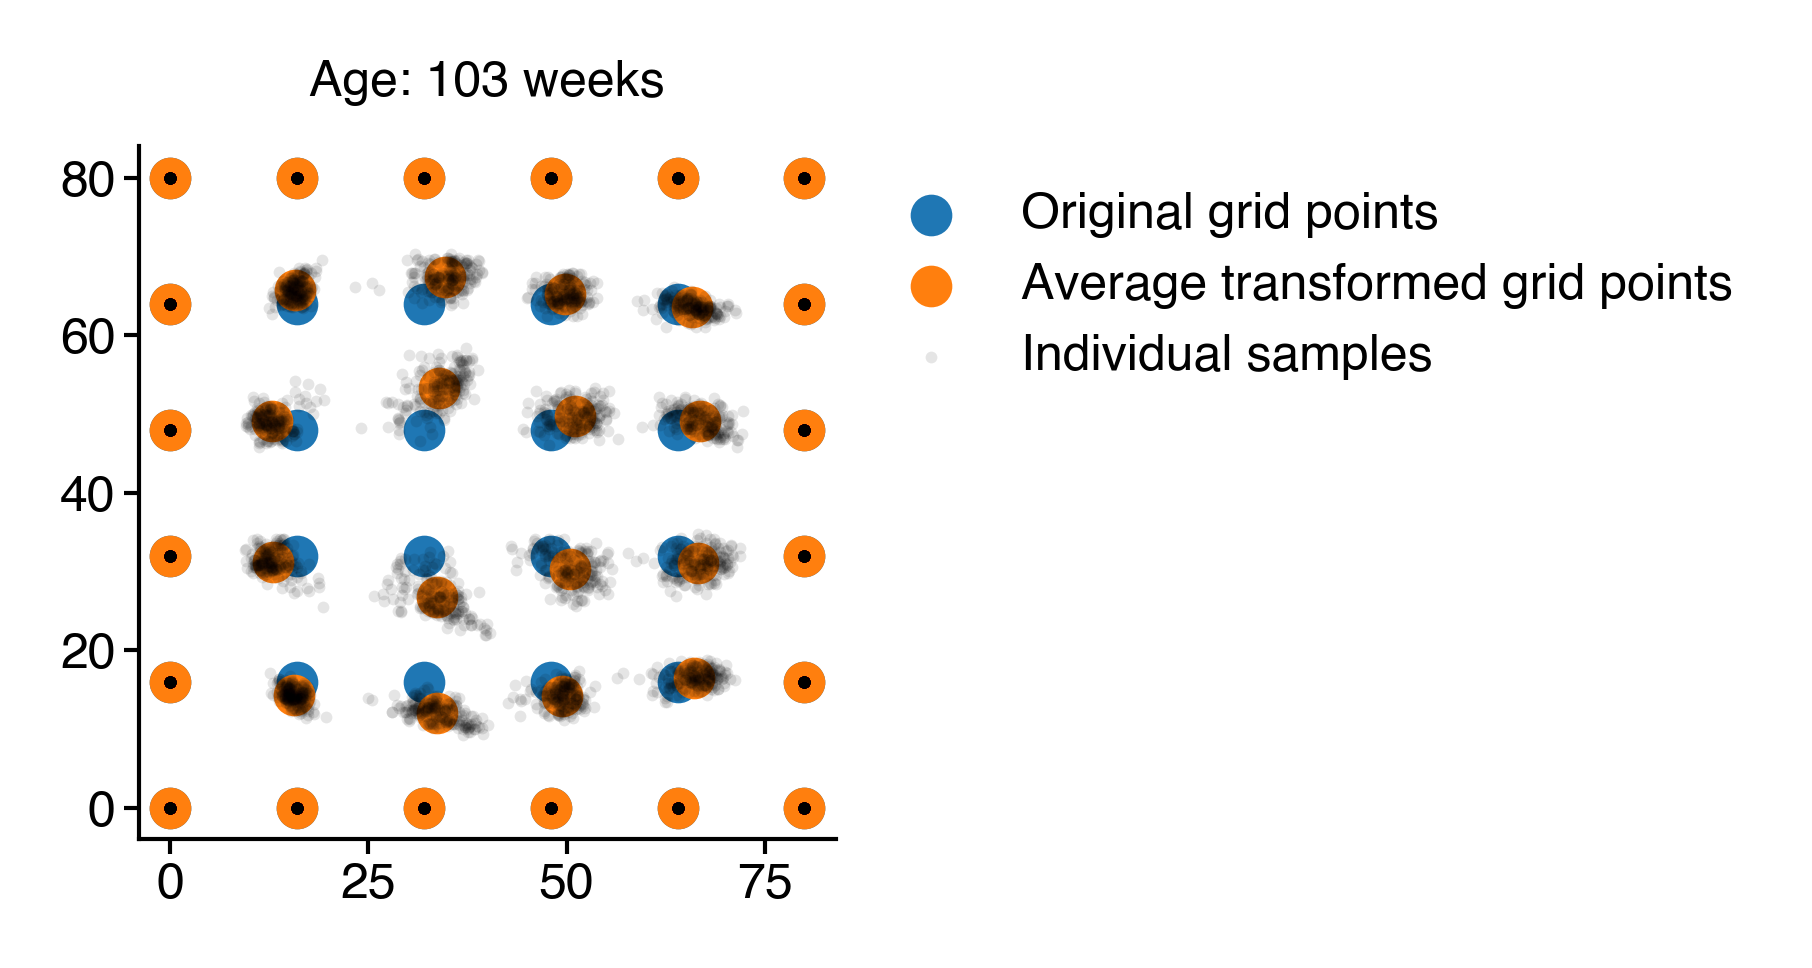

In [37]:
_d = fits[103]
avg_grid = grid_xform(np.array([_d[k]['transformed_grid'] for k in _d]).mean(0))
figure(1.5, 1.5)
plt.scatter(*grid_xform(_d[list(_d)[0]]['grid']).T, s=25, lw=0, label="Original grid points")
plt.scatter(*avg_grid.T, s=25, lw=0, label="Average transformed grid points")
for i, k in enumerate(_d):
    if i == 0:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0, label="Individual samples")
    else:
        plt.scatter(*grid_xform(_d[k]['transformed_grid']).T, s=2, alpha=0.1, c='k', lw=0)
plt.title("Age: 103 weeks")
legend()
sns.despine()

Text(0.5, 0.98, 'Age: 103 weeks')

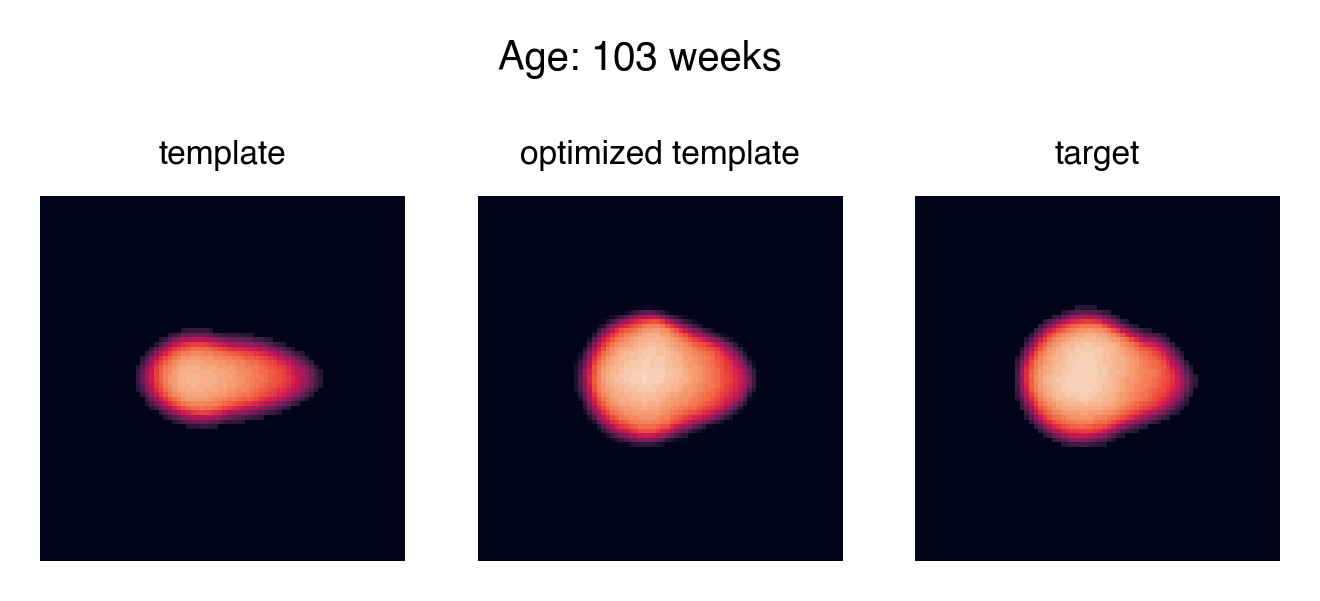

In [38]:
_keys = list(_d)
ex = _d[_keys[1]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle("Age: 103 weeks")

Text(0.5, 0.98, 'Age: 103 weeks')

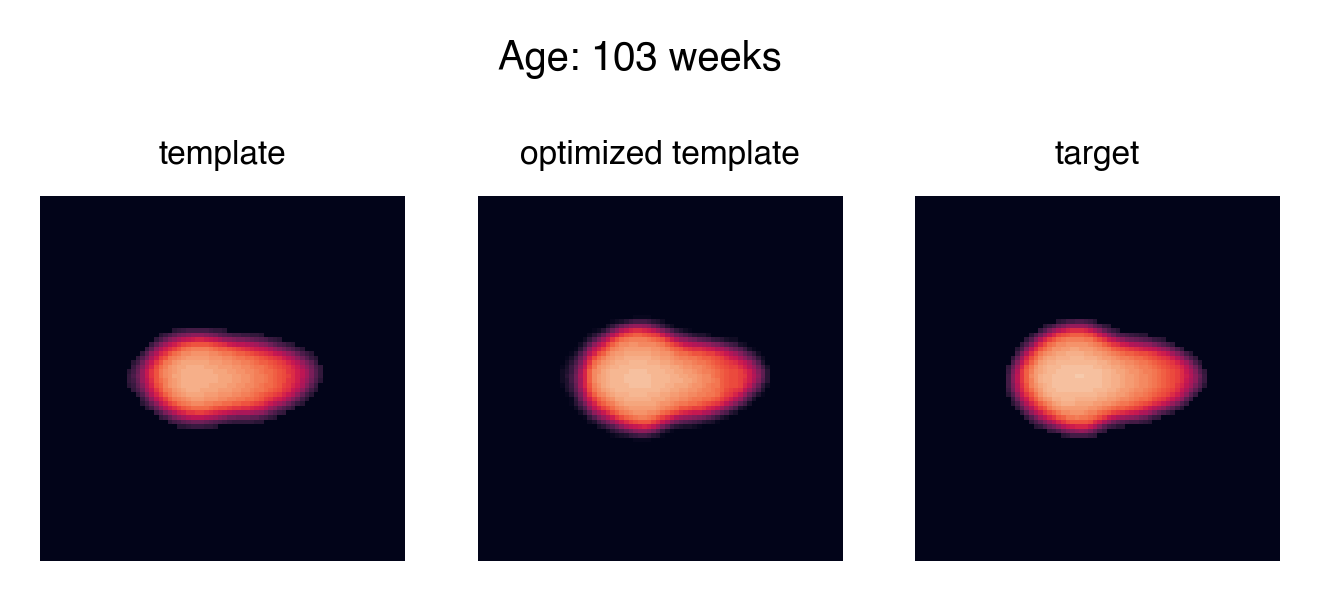

In [39]:
_keys = list(_d)
ex = _d[_keys[3]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle("Age: 103 weeks")

Text(0.5, 0.98, 'Age: 103 weeks')

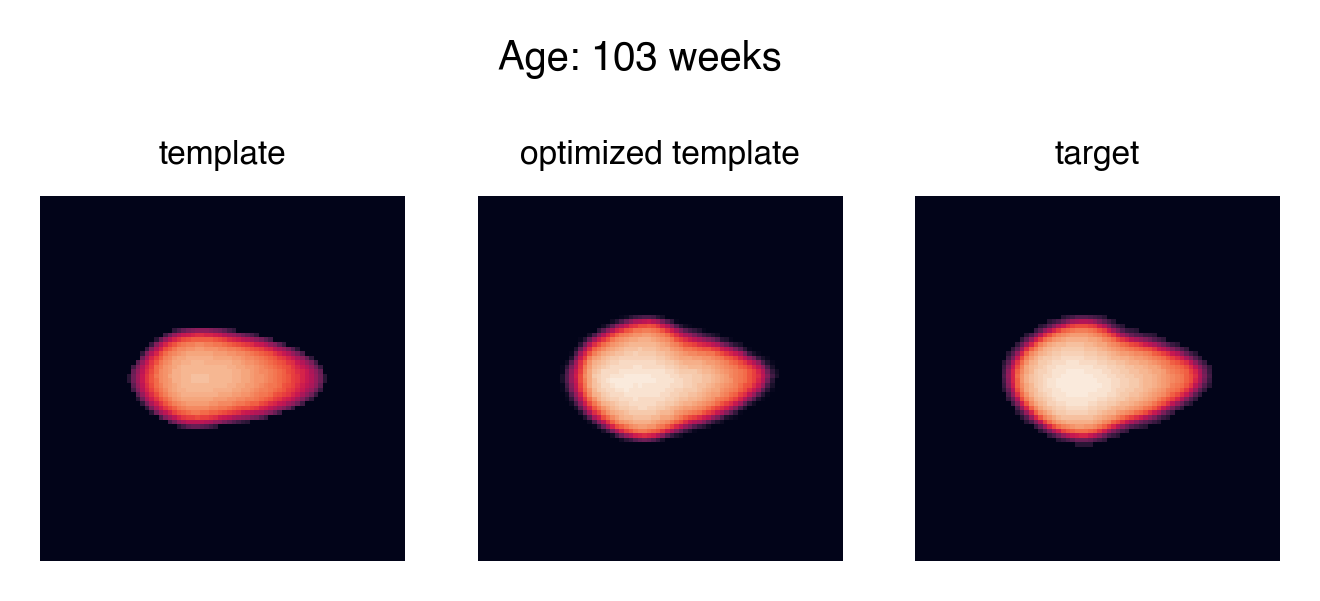

In [40]:
_keys = list(_d)
ex = _d[_keys[11]]
fig, ax = plt.subplots(1, 3, figsize=(4, 1.75))
ax[0].imshow(ex['template'], vmax=45)
ax[1].imshow(ex['optimized_template'], vmax=45)
ax[2].imshow(ex['target'], vmax=45)
for a, title in zip(ax.flat, ['template', 'optimized template', 'target']):
    a.set_title(title)
    a.axis('off')
fig.suptitle("Age: 103 weeks")

## Sample from the movement vectors

Assume a multivariate students t distribution

In [11]:
_d = fits[103]
movements = np.array([_d[k]['params']['movement_vector'].reshape(-1, 2) for k in _d])
movements = flatten(movements)

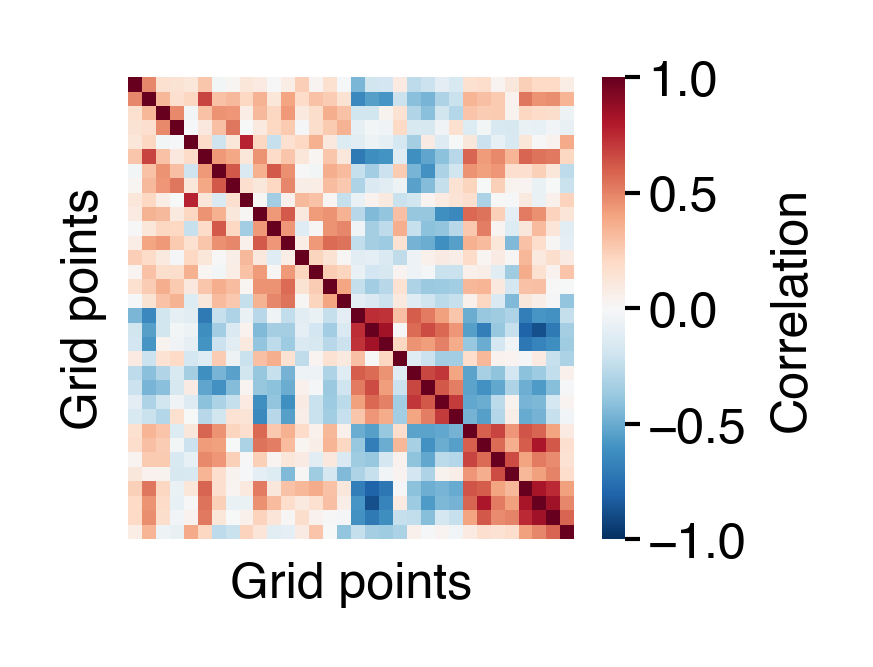

In [316]:
figure(1.2, 1)
ax = sns.heatmap(np.corrcoef(movements.T), cmap="RdBu_r", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
ax.set(xticks=[], yticks=[], xlabel="Grid points", ylabel="Grid points");

In [12]:
from scipy.stats import multivariate_t

In [13]:
mean_vector = movements.mean(0)
covariance = np.cov(movements, rowvar=False)
degress_of_freedom = 7

In [14]:
rv = multivariate_t(mean_vector, covariance, degress_of_freedom)

In [15]:
# sample from a multivariate gaussian
# chol = np.linalg.cholesky(covariance)
# samples = np.random.randn(len(movements), len(mean_vector)) @ chol.T + mean_vector

samples = rv.rvs(500, random_state=0)

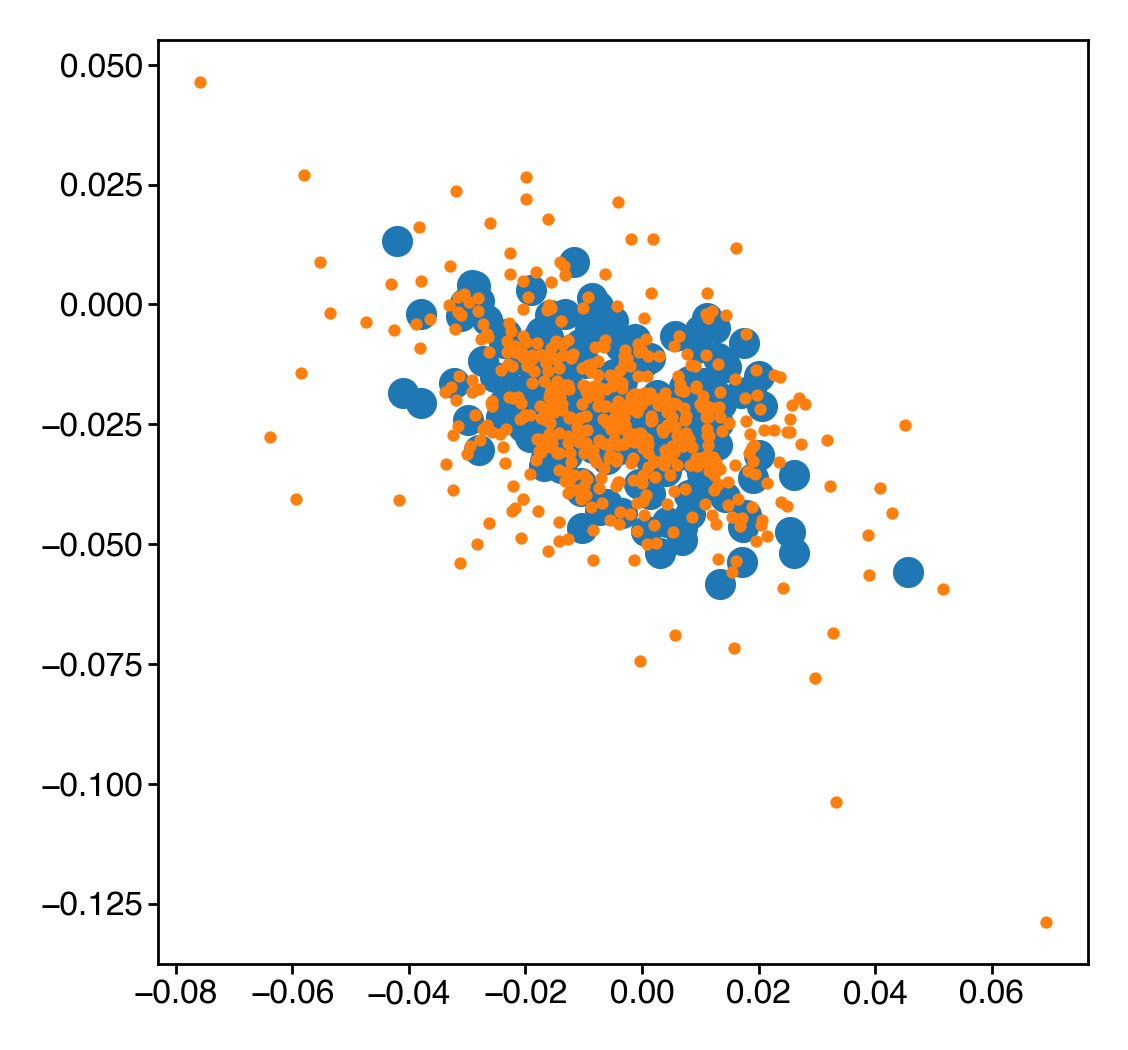

In [16]:
plt.scatter(movements[:, 0], movements[:, 16])
plt.scatter(samples[:, 0], samples[:, 16], s=2)

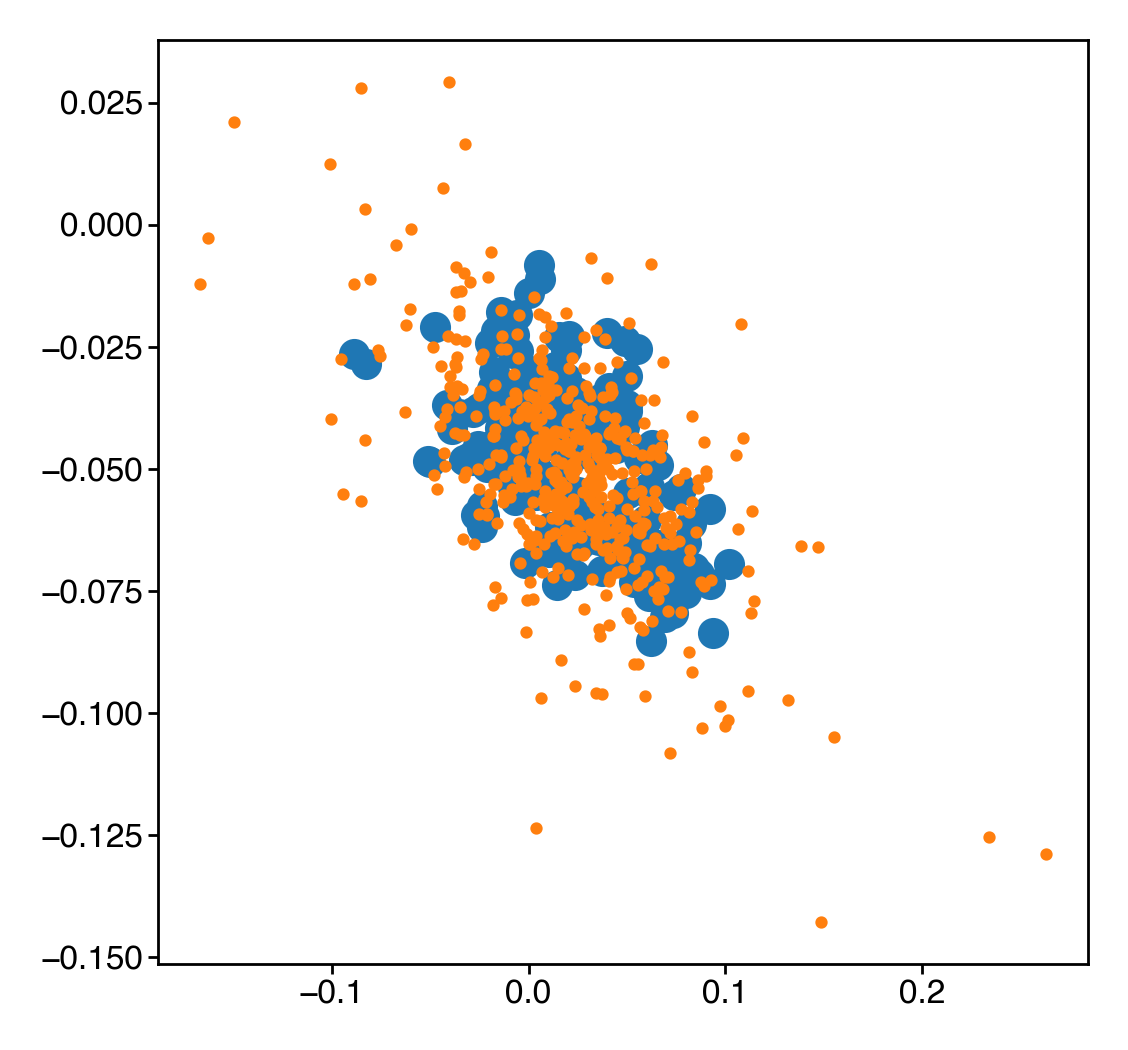

In [17]:
plt.scatter(movements[:, 1], movements[:, 17])
plt.scatter(samples[:, 1], samples[:, 17], s=2)

In [18]:
degress_of_freedom = 7
t_params = {}
for age, _d in fits.items():
    movements = np.array([_d[k]['params']['movement_vector'].reshape(-1, 2) for k in _d])
    movements = flatten(movements)
    mean_vector = movements.mean(0)
    covariance = np.cov(movements, rowvar=False)
    t_params[age] = (mean_vector, covariance, degress_of_freedom)
joblib.dump(t_params, train_paths.tps_multivariate_t_params, compress=3)

In [52]:
from toolz import pluck, thread_last

In [53]:
def pluck_in(keys: list, seq):
    out = thread_last(seq, *((pluck, key) for key in keys))
    return out

In [60]:
examples = np.array(list(pluck_in(['params', 'scale_tensor'], _d.values())))
example = np.mean(examples, axis=0)

In [61]:
examples.shape

(176, 2)

<Axes: ylabel='Count'>

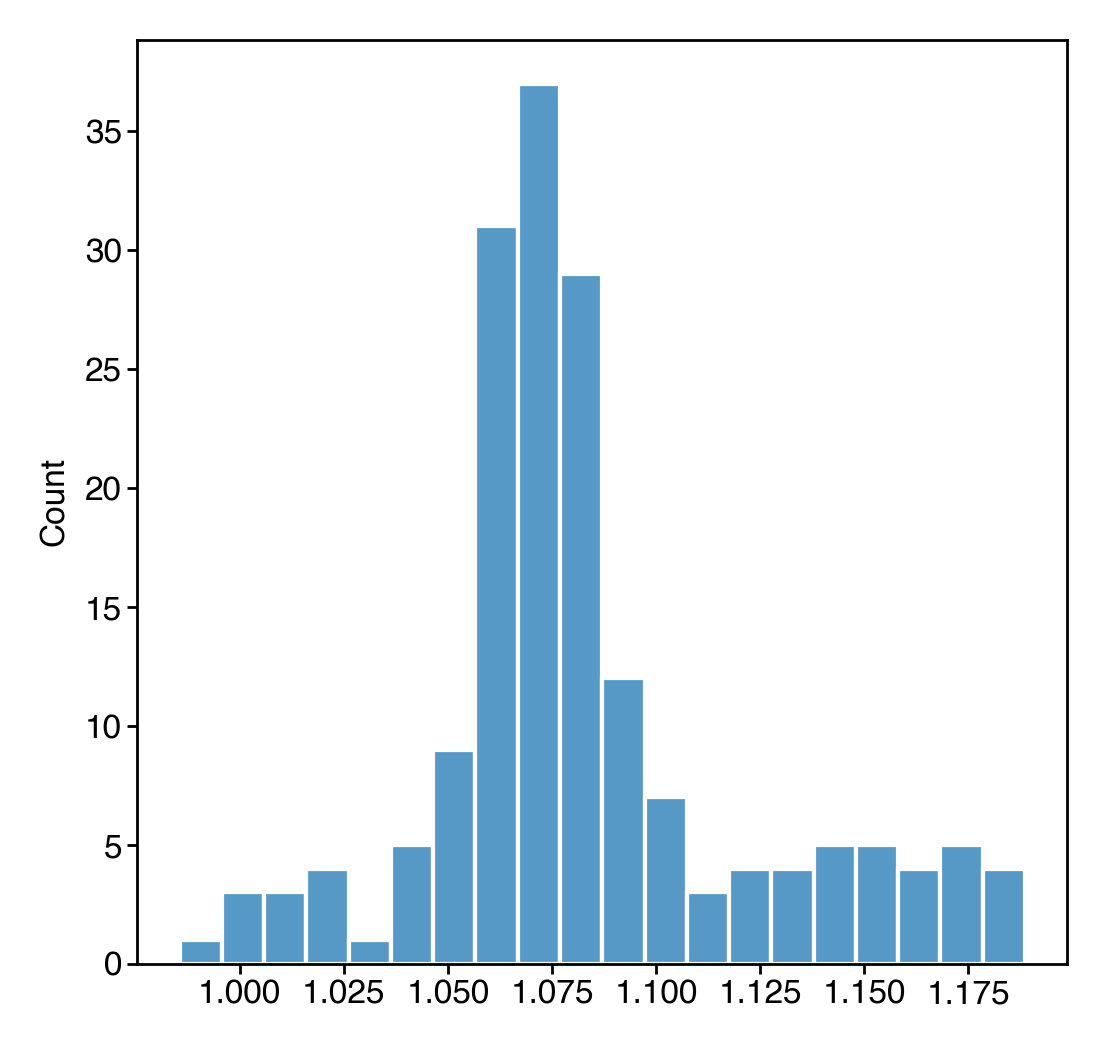

In [63]:
sns.histplot(examples[:, 1], bins=20)

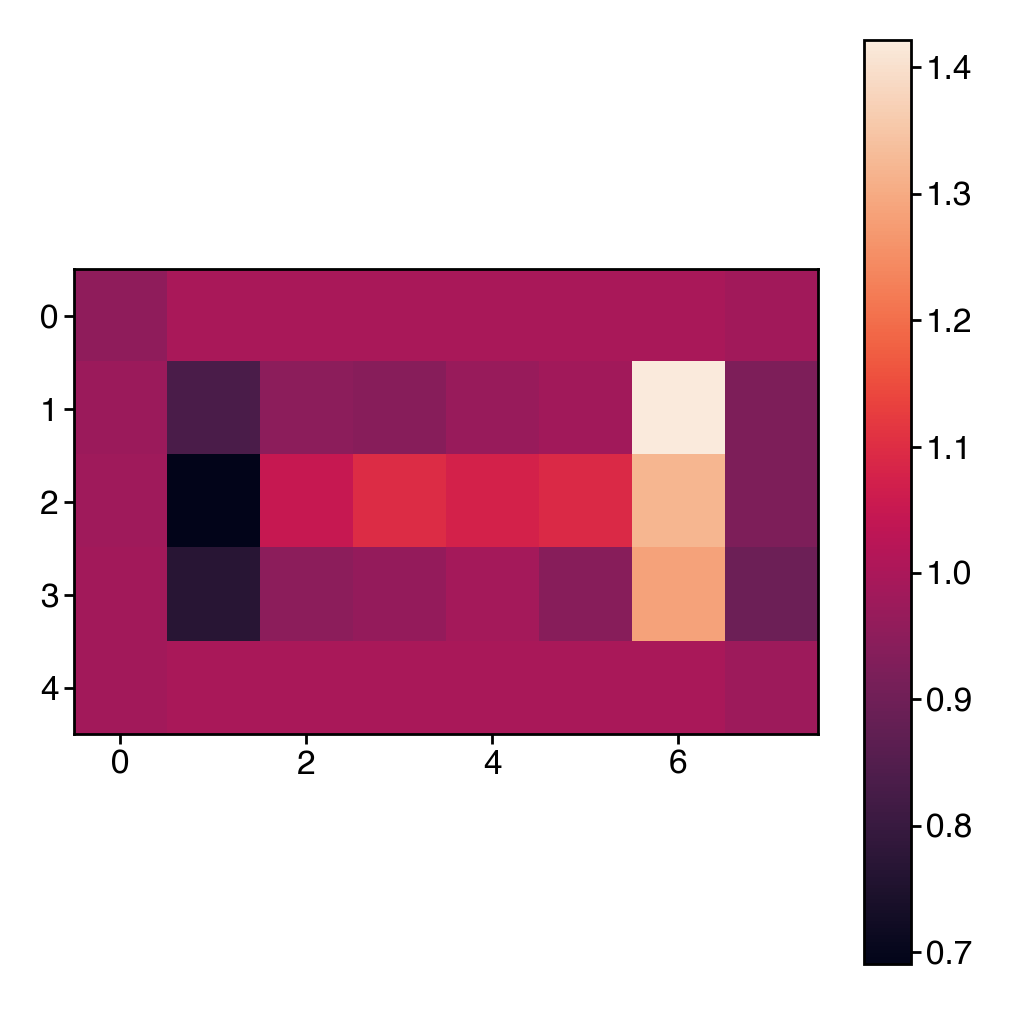

In [43]:
plt.imshow(example)
plt.colorbar()

In [64]:
degress_of_freedom = 7
t_params = {
    'tps': {},
    'height': {},
    'scale': {},
}
for age, _d in fits.items():
    movements = np.array([_d[k]['params']['movement_vector'].reshape(-1, 2) for k in _d])
    movements = flatten(movements)
    mean_vector = movements.mean(0)
    covariance = np.cov(movements, rowvar=False)
    t_params['tps'][age] = (mean_vector, covariance, degress_of_freedom)
    
    # compute height sampling
    heights = np.array(list(pluck_in(['params', 'height_mtx'], _d.values())))
    heights = flatten(heights)
    mean_height_vector = heights.mean(0)
    height_covariance = np.cov(heights, rowvar=False)
    t_params['height'][age] = (mean_height_vector, height_covariance, degress_of_freedom)

    # compute scale sampling
    scales = np.array(list(pluck_in(['params', 'scale_tensor'], _d.values())))
    scales = flatten(scales)
    mean_scale_vector = scales.mean(0)
    scale_covariance = np.cov(scales, rowvar=False)
    t_params['scale'][age] = (mean_scale_vector, scale_covariance, degress_of_freedom)
joblib.dump(t_params, train_paths.tps_multivariate_t_params, compress=3)

['/n/groups/datta/win/longtogeny/size_norm/training_data/tps_multivariate_t_params.p.gz']

In [65]:
mean_vector.shape

(32,)

In [72]:
np.mean([_d[k]['params']['movement_vector'] for k in _d], axis=0)

array([[[-0.00549143,  0.0205966 ,  0.01711511,  0.02611888],
        [-0.03758374,  0.02028198,  0.03094392,  0.03300083],
        [-0.03889886,  0.0245635 ,  0.0378864 ,  0.03484404],
        [-0.00321841,  0.03395404,  0.02230859,  0.02247866]],

       [[-0.02201162, -0.04915579, -0.0232289 ,  0.00573074],
        [-0.01016307, -0.06595679, -0.02146136, -0.01153885],
        [ 0.0131036 ,  0.06527067,  0.02117424,  0.01385611],
        [ 0.02098112,  0.04148731,  0.0153651 , -0.00570875]]],
      dtype=float32)

In [73]:
mean_vector.reshape(2, 4, 4)

array([[[-0.00549143,  0.0205966 ,  0.01711511,  0.02611888],
        [-0.03758374,  0.02028198,  0.03094392,  0.03300083],
        [-0.03889886,  0.0245635 ,  0.0378864 ,  0.03484404],
        [-0.00321841,  0.03395404,  0.02230859,  0.02247866]],

       [[-0.02201162, -0.04915579, -0.0232289 ,  0.00573074],
        [-0.01016307, -0.06595679, -0.02146136, -0.01153885],
        [ 0.0131036 ,  0.06527067,  0.02117424,  0.01385611],
        [ 0.02098112,  0.04148731,  0.0153651 , -0.00570875]]],
      dtype=float32)